In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import math, os, h5py
import pandas as pd

Welcome to JupyROOT 6.28/06


In [2]:
import getpass
# open access to cernbox
os.system("echo %s| kinit" %getpass.getpass())


········


0

Password for ggrosso@CERN.CH: 


# Preparing files with all corrections and matches, plus PT scale effects
- first cure all the theoretical mismatches (first three steps of matching, saving the cols for muonpt scale, keep mass cut lower)
- then apply the scale effect
- hard cut at 200 in the mass and a and reweight according to the control region

# GEN $\mu\mu$ mass reweighting

In [4]:
p0_17                     =     0.924294   #+/-   0.000604102 
p1_17                     =  9.94755e-05   #+/-   4.34848e-06 
p2_17                     = -3.77688e-08   #+/-   7.74373e-09
p3_17                     =  3.07152e-12   #+/-   4.44936e-12 
p4_17                     =  3.38755e-15   #+/-   9.78797e-16 
p5_17                     =  -4.0326e-19   #+/-   7.19032e-20 

p0_18                     =     0.909877   #+/-   0.000574991 
p1_18                     =  0.000133381   #+/-   4.2549e-06  
p2_18                     = -6.96213e-08   #+/-   7.64677e-09 
p3_18                     =  1.53648e-11   #+/-   4.40582e-12 
p4_18                     =  1.34413e-15   #+/-   9.70502e-16 
p5_18                     = -2.81931e-19   #+/-   7.13438e-20

# GEN lead $\mu$pt reweighting

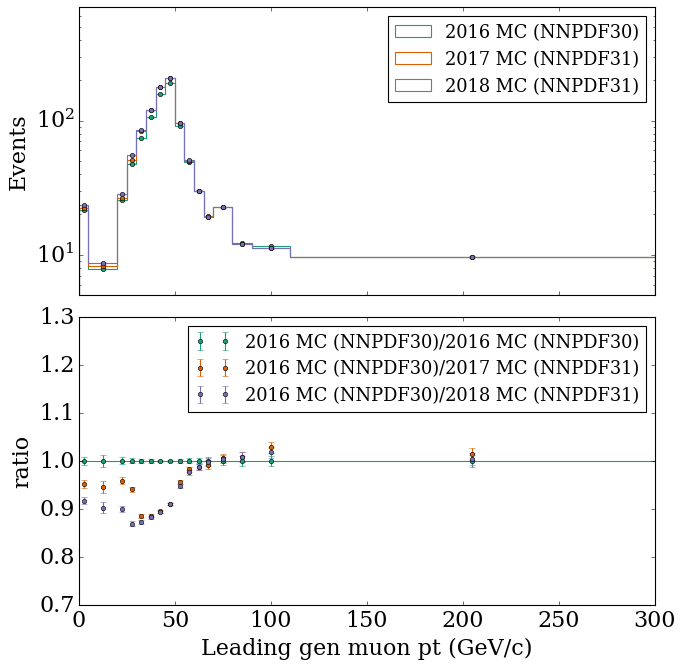

[  0   5  20  25  30  35  40  45  50  55  60  65  70  80  90 110 300]
[1.         0.95121931 0.94568703 0.95910331 0.9412825  0.88452876
 0.8857292  0.89480496 0.90997479 0.95654948 0.98233698 0.98809849
 0.9923274  1.00694427 1.00819101 1.02821348 1.01360359 1.        ]
[1.         0.91724935 0.90240104 0.89975837 0.86946652 0.87302165
 0.88224794 0.89331082 0.90973713 0.94791137 0.97655737 0.98696119
 0.99692878 1.00453093 1.00824668 1.01765186 1.00347209 1.        ]


In [5]:
DIR_INPUT = '/eos/cms/store/group/phys_exotica/darkPhoton/schhibra/MLTechnique/'
df16   = ROOT.RDataFrame('treegen', DIR_INPUT+'RecoNTuples2018/v3/trim_ZToMuMu_M_50_120_2016.root')
df17   = ROOT.RDataFrame('treegen', DIR_INPUT+'RecoNTuples2017/v3/trim_ZToMuMu_M_50_120_2017.root')
df18   = ROOT.RDataFrame('treegen', DIR_INPUT+'RecoNTuples2018/v3/trim_ZToMuMu_M_50_120_2018.root')

npdf16 = df16.AsNumpy(['genleadmupt', 'mcweight'])
npdf17 = df17.AsNumpy(['genleadmupt', 'mcweight'])
npdf18 = df18.AsNumpy(['genleadmupt', 'mcweight'])

bins= np.array([0, 5, 20, 25, 30, 35, 40, 45, 50, 55, 60,65, 70, 80, 90, 110, 300])

colors = ['#1b9e77','#d95f02','#7570b3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
fig = plt.figure(figsize=(9, 9))
fig.patch.set_facecolor('white') 
ax1 = fig.add_axes([0.15, 0.53, 0.8, 0.4]) 

h16 = plt.hist(npdf16['genleadmupt'], weights=1975.0*npdf16['mcweight'], bins=bins,#75, range=(10., 200.), 
               histtype='step', label='2016 MC (NNPDF30)', color=colors[0])
h17 = plt.hist(npdf17['genleadmupt'], weights=2112.904*npdf17['mcweight'], bins=bins,#75, range=(10., 200.), 
               histtype='step', label='2017 MC (NNPDF31)', color=colors[1])
h18 = plt.hist(npdf18['genleadmupt'], weights=2112.904*npdf18['mcweight'], bins=bins,#75, range=(10., 200.), 
               histtype='step', label='2018 MC (NNPDF31)', color=colors[2])

h16_squared = plt.hist(npdf16['genleadmupt'], weights=(1975.0  *npdf16['mcweight'])**2, bins=bins, alpha=0.)
h17_squared = plt.hist(npdf17['genleadmupt'], weights=(2112.904*npdf17['mcweight'])**2, bins=bins, alpha=0.)
h18_squared = plt.hist(npdf18['genleadmupt'], weights=(2112.904*npdf18['mcweight'])**2, bins=bins, alpha=0.)

plt.errorbar(0.5*(bins[1:]+bins[:-1]), h16[0], yerr=np.sqrt(h16_squared[0]), marker='o', markersize=4, ls='', color=colors[0])
plt.errorbar(0.5*(bins[1:]+bins[:-1]), h17[0], yerr=np.sqrt(h17_squared[0]), marker='o', markersize=4, ls='', color=colors[1])
plt.errorbar(0.5*(bins[1:]+bins[:-1]), h18[0], yerr=np.sqrt(h18_squared[0]), marker='o', markersize=4, ls='', color=colors[2])
plt.ylabel('Events', fontsize=20, fontname='serif')
plt.yscale('log')
plt.yticks(fontsize=20, fontname='serif')
plt.tick_params(axis='x', which='both',    labelbottom=False)

font = font_manager.FontProperties(family='serif', size=16)
plt.legend(prop=font, numpoints=1, loc='best', ncol=1, columnspacing=1.)
plt.xlim(bins[0], bins[-1])
plt.ylim(5, 700)
#####
ax2 = fig.add_axes([0.15, 0.1, 0.8, 0.4]) 
plt.plot(np.arange(0, 500, 10), np.ones(50), color=colors[0],)
plt.errorbar(0.5*(bins[1:]+bins[:-1]), h16[0]/h16[0], yerr=h16[0]/h16[0]*np.sqrt(h16_squared[0]/h16[0]**2+h16_squared[0]/h16[0]**2), marker='o', markersize=4, ls='', color=colors[0], label='2016 MC (NNPDF30)/2016 MC (NNPDF30)')
plt.errorbar(0.5*(bins[1:]+bins[:-1]), h16[0]/h17[0], yerr=h16[0]/h17[0]*np.sqrt(h17_squared[0]/h17[0]**2+h16_squared[0]/h16[0]**2), marker='o', markersize=4, ls='', color=colors[1], label='2016 MC (NNPDF30)/2017 MC (NNPDF31)')
plt.errorbar(0.5*(bins[1:]+bins[:-1]), h16[0]/h18[0], yerr=h16[0]/h18[0]*np.sqrt(h18_squared[0]/h18[0]**2+h16_squared[0]/h16[0]**2), marker='o', markersize=4, ls='', color=colors[2], label='2016 MC (NNPDF30)/2018 MC (NNPDF31)')
plt.ylim(0.7, 1.3)
plt.xlabel('Leading gen muon pt (GeV/c)', fontsize=20, fontname='serif')
plt.xlim(bins[0], bins[-1])
plt.yticks(fontsize=20, fontname='serif')
plt.xticks(fontsize=20, fontname='serif')
plt.ylabel('ratio', fontsize=20, fontname='serif')  
plt.legend(ncol=1, prop=font,)
plt.savefig('./genleadmupt_ratio.pdf')
plt.show()

ratioPT18 = h16[0]/h18[0]
ratioPT18 = np.append(ratioPT18, np.array([1]))
ratioPT18 = np.append(np.array([1]), ratioPT18)

ratioPT17 = h16[0]/h17[0]
ratioPT17 = np.append(ratioPT17, np.array([1]))
ratioPT17 = np.append(np.array([1]), ratioPT17)

ratioPT16 = h16[0]/h16[0]
ratioPT16 = np.append(ratioPT16, np.array([1]))
ratioPT16 = np.append(np.array([1]), ratioPT16)

bins_ratioPT = bins

print(bins_ratioPT)
print(ratioPT17)
print(ratioPT18)

# PI and NNLO corrections (to DY only)

In [6]:
p0_PI, p1_PI, p2_PI, p3_PI= 1.047, -0.000143, 5.167e-8, -7.84e-12

def poly5(x, a0, a1, a2, a3, a4=0, a5=0, shift=0):
    y = x-shift
    return a0+ a1*y + a2*y*y + a3*y*y*y + a4*y*y*y*y + a5*y*y*y*y*y

# $\mu$PT scale correction

In [7]:
def Apply_MuonMomentumScale_Correction(dictionary, muon_scale=0):
    muon_mass = 0.1#0565837 #GeV/c2  
    m1SF = dictionary['m1SF']
    m2SF = dictionary['m2SF']
    m1SF_err = dictionary['m1SFErr']
    m2SF_err = dictionary['m2SFErr']
    
    pt1  = dictionary['leadmupt']/m1SF*(m1SF + muon_scale*m1SF_err)
    pt2  = dictionary['subleadmupt']/m2SF*(m2SF + muon_scale*m2SF_err)
    eta1 = dictionary['leadmueta']
    eta2 = dictionary['subleadmueta']
    dphi = dictionary['delta_phi']

    px1= pt1
    px2= pt2*np.cos(dphi)
    py1= np.zeros_like(pt1)
    py2= pt2*np.sin(dphi)
    pz1= pt1*np.sinh(eta1)
    pz2= pt2*np.sinh(eta2)
    E1 = np.sqrt(px1*px1+py1*py1+pz1*pz1+muon_mass*muon_mass)
    E2 = np.sqrt(px2*px2+py2*py2+pz2*pz2+muon_mass*muon_mass)

    px  = px1+px2
    py  = py1+py2
    pz  = pz1+pz2
    E   = E1+E2
    mll = np.sqrt(E*E-px*px-py*py-pz*pz)
    ptll= np.sqrt(px**2+py**2)
    dictionary['leadmupt']= pt1
    dictionary['subleadmupt']= pt2
    dictionary['mass']= mll
    dictionary['dimuonpt']= ptll
    return

# define function to process root files

In [3]:
def create_MCsamples_nu_info(DIR_INPUT, DIR_OUTPUT, trim_list, columns_MC, columns_saving, columns_weight, mass_cut, ratioPT, muonpt_scale, poly5_mass, poly5_PI):
    for process in trim_list:
        if not os.path.exists(DIR_INPUT+process+'.root'): 
            print('wrong path: %s'%(DIR_INPUT+process+'.root'))
            break
        df   = ROOT.RDataFrame('tree', DIR_INPUT+process+'.root')
        if len(poly5_mass) and 'genmass' in process:
            npdf = df.AsNumpy(columns_MC+['genmass'])
        else: 
            npdf = df.AsNumpy(columns_MC)
        pddf = pd.DataFrame(npdf)    
        pddf_sel = pddf.loc[ (np.abs(pddf['m1eta'])<=1.9)        & (np.abs(pddf['m2eta'])<=1.9)        &
                             (np.abs(pddf['m1dB']) <0.2)         & (np.abs(pddf['m2dB']) <0.2)         & 
                             (np.abs(pddf['m1dz']) <0.5)         & (np.abs(pddf['m2dz']) <0.5)         &
                             (np.abs(pddf['m1iso'])<0.15)        & (np.abs(pddf['m2iso'])<0.15)        &
                             (np.abs(pddf['mass']) >0.9*mass_cut)    & 
                             (np.abs(pddf['nbjets'])==0)         & (pddf['nmu']==2)
                            ]
        pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
        pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
        pddf_sel['subleadmupt'] = pddf_sel['m2pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m1pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
        pddf_sel['leadmueta']   = pddf_sel['m1eta']*(pddf_sel['m1pt']>=pddf_sel['m2pt']) + pddf_sel['m2eta']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
        pddf_sel['subleadmueta']= pddf_sel['m2eta']*(pddf_sel['m1pt']>=pddf_sel['m2pt']) + pddf_sel['m1eta']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
        pddf_sel['delta_R']     = DeltaR(pddf_sel['delta_phi'], pddf_sel['leadmueta'], pddf_sel['subleadmueta'])
        
        # apply GEN lead mu pt reweighting
        pddf_sel['ptweight_idx']= np.digitize(pddf_sel['genleadmupt'].to_numpy(), bins)
        pddf_sel['ptweight'] = (pddf_sel['genleadmupt'].to_numpy()<=0)*np.ones_like(pddf_sel['mass'].to_numpy()) + (pddf_sel['genleadmupt'].to_numpy()>0)*np.array([ratioPT[i] for i in pddf_sel['ptweight_idx'].to_numpy()])
        
        # apply GEN mass reweight only to DY:
        pddf_sel['massweight'] = np.ones_like(pddf_sel['ptweight'])
        if len(poly5_mass):
            if ('ZToMuMu' in process) and ('genmass' in process):
                pddf_sel['massweight'] *= poly5(pddf_sel['genmass'], poly5_mass[0], poly5_mass[1], poly5_mass[2], poly5_mass[3], poly5_mass[4], poly5_mass[5])
        
        # apply PI correction reweight only to DY:
        pddf_sel['PIweight'] = np.ones_like(pddf_sel['ptweight'])
        if 'ZToMuMu' in process:
            pddf_sel['PIweight'] *= poly5(x=pddf_sel['mass'], a0=poly5_PI[0], a1=poly5_PI[1], a2=poly5_PI[2], a3=poly5_PI[3], a4=0, a5=0, shift=400)
        
        pddf_sel['weight']  = LUMINOSITY*xsec_dict[process]*pddf_sel['puweight'].to_numpy()*pddf_sel['exweight'].to_numpy()*pddf_sel['trgweight'].to_numpy()*pddf_sel['mcweight'].to_numpy()
        pddf_sel['weight'] *= pddf_sel['ptweight'].to_numpy()*pddf_sel['massweight']*pddf_sel['PIweight']

        # apply muon pt scale
        Apply_MuonMomentumScale_Correction(pddf_sel, muon_scale=muonpt_scale_nu)
        
        # apply additional cuts (dependent of pt rescaling)
        pddf_sel = pddf_sel.loc[(pddf_sel['mass']>mass_cut) & (pddf_sel['leadmupt']>53) & (pddf_sel['subleadmupt']>53) ]
        
        print('Process: '+process)
        print('number of simulations: %i'%(pddf_sel['weight'].to_numpy().shape[0]))
        print('expected yield: %i'%(np.sum(pddf_sel['weight'].to_numpy())))
        if not pddf_sel['weight'].to_numpy().shape[0]==0:
            print('weights: min: %f, max: %f'%(np.min(pddf_sel['weight'].to_numpy()), np.max(pddf_sel['weight'].to_numpy()) ) )
        plt.hist(pddf_sel['m1SFErr']/pddf_sel['m1SF'], label=process)
        plt.legend()
        plt.xlabel('pt scale error (%)')
        plt.ylabel('counts')
        plt.show()
        plt.close()
        f = h5py.File(DIR_OUTPUT+process+'.h5', 'w')
        for p in columns_saving:
            f.create_dataset(p, data=pddf_sel[p].to_numpy(), compression='gzip')
        for p in columns_weight:
            f.create_dataset(p, data=pddf_sel[p].to_numpy(), compression='gzip')
        f.close()
        print('saved')
        del df, pddf, npdf, pddf_sel
    return

def Read_from_h5(INPUT_PATH, trim_list, labels_dict, read_keys=[], mass_min=None, mass_max=None, isdata=False):
    REF, W_REF, Y_REF = np.array([]), np.array([]), np.array([])
    i=0
    for process in trim_list:
        if isdata: y_label = 1
        else: y_label = labels_dict[process]
        f = h5py.File(INPUT_PATH+process+'.h5', 'r')
        if len(read_keys)==0: 
            read_keys = list(f.keys())
            print('keys: ', read_keys)
        idx_weight = np.argwhere(np.array(read_keys)=='weight').reshape(-1,)[0]
        read_file  = np.array([])
        mass_mask = np.ones(np.array(f.get(read_keys[0])).shape[0])>0
        if 'mass' in list(f.keys()):
            mass = np.array(f.get('mass')) 
            if mass_min!=None:
                mass_mask *= (mass>mass_min)
            if mass_max!=None:
                mass_mask *= (mass<mass_max)
        if np.sum(mass_mask)==0:
            f.close()
            continue
        if np.array(f.get(read_keys[0])).shape[0]==0: 
            f.close()
            continue
        print(process)
        for p in read_keys:
            col = np.array(f.get(p)) 
            col = col[mass_mask]
            col = np.expand_dims(col, axis=1)
            if read_file.shape[0]==0:
                read_file = col
            else:
                read_file = np.concatenate((read_file, col), axis=1)
        f.close()
        if REF.shape[0]==0:
            REF    = np.delete(read_file, idx_weight, 1)#[:, :-1]
            W_REF  = read_file[:, idx_weight:(idx_weight+1)]
            Y_REF  = np.ones_like(np.delete(read_file, idx_weight, 1))*y_label
        else:
            REF    = np.concatenate((REF,    np.delete(read_file, idx_weight, 1)), axis=0)
            W_REF  = np.concatenate((W_REF,  read_file[:, idx_weight:(idx_weight+1)]), axis=0)
            Y_REF  = np.concatenate((Y_REF,  np.ones_like(np.delete(read_file, idx_weight, 1))*y_label), axis=0)
        i+=1
        
    return REF, W_REF, Y_REF, np.delete(np.array(read_keys), idx_weight, 0)

def plot_variable(key, REF, W_REF, Y_REF , DATA, W_DATA, Y_DATA, keys_REF, keys_DATA, bins_dict, colors_dict, ref_labels_dict,  ref_labels,
                  mass_min=0, mass_max=6000, ylim_ratio_dict=None, log=True, mask_REF=[], mask_DATA=[], output_folder='', year='', save=False, ):
    i_REF=np.argwhere(np.array(keys_REF)==key).reshape(-1,)[0]
    i_DATA=np.argwhere(np.array(keys_DATA)==key).reshape(-1,)[0]
    i=i_REF
    keys=keys_REF
    plt.rcParams["font.family"] = "serif"
    plt.style.use('classic')
    fig = plt.figure(figsize=(9, 9))                                                                                                                                            
    fig.patch.set_facecolor('white')                                                                                                                                              
    ax1 = fig.add_axes([0.15, 0.38, 0.8, 0.55]) 
    bins = bins_dict[keys[i]] 
    mass_idx = np.argwhere(np.array(keys_DATA)=='mass').reshape(-1,)[0]
    mask_m = (DATA[:, mass_idx]>mass_min)*(DATA[:, mass_idx]<mass_max)
    if len(mask_DATA):
        mask_m=mask_m*mask_DATA
    var  = DATA[:, i_DATA]
    w    = W_DATA[:, 0]
    var  = var[mask_m]
    w    = w[mask_m]
    
    hD   = plt.hist(var, weights=w, histtype='step', lw=3, bins=bins, color='black', alpha=0.)
    plt.errorbar(0.5*(hD[1][1:]+hD[1][:-1]), hD[0], yerr=np.sqrt(hD[0]), marker='o', markersize=4, ls='', color='black', label='Data %s'%(year))
    mass_idx = np.argwhere(np.array(keys_REF)=='mass').reshape(-1,)[0]
    mask_m = (REF[:, mass_idx]>mass_min)*(REF[:, mass_idx]<mass_max)
    if len(mask_REF):
        mask_m=mask_m*mask_REF
    var  = REF[:, i_REF]
    w    = W_REF[:, 0]
    y    = Y_REF[:, 0]
    var  = var[mask_m]
    w    = w[mask_m]
    y    = y[mask_m]
    hR   = plt.hist([var[y==j] for j in [ref_labels_dict[rl] for rl in ref_labels]] ,  
                    weights=[w[y==j] for j in [ref_labels_dict[rl] for rl in ref_labels]],  
                    histtype='barstacked', lw=1, label=ref_labels, bins=bins, 
                    color=[colors_dict[rl] for rl in ref_labels],rwidth=1.)
    hR1  = plt.hist([var[y==j] for j in [ref_labels_dict[rl] for rl in ref_labels]] ,  
                    weights=[w[y==j]**2 for j in [ref_labels_dict[rl] for rl in ref_labels]],  
                    alpha=0., lw=1, bins = bins_dict[keys[i]])    
    
    plt.ylabel('Events', fontsize=20, fontname='serif')
    plt.yscale('log')
    if keys[i] in ['leadmupt','subleadmupt', 'mass', 'dimuonpt'] and log==True: plt.xscale('log')
    plt.yticks(fontsize=20, fontname='serif')
    plt.tick_params(axis='x', which='both',    labelbottom=False)
    font = font_manager.FontProperties(family='serif', size=14)
    #if i in [2,3,4]: ncols = 3
    #else: ncols = 1
    if len(colors)==6:
        ncols=4
    else:
        ncols=3
    plt.xlim(bins[0], bins[-1])
    if 'eta' in keys[i]:
        plt.ylim(0, 10*np.max(hR[0][-1, :]))
    elif 'phi' in keys[i]:
        plt.ylim(0, 100*np.max(hR[0][-1, :]))
    else:
        plt.ylim(0, 1000*np.max(hR[0][-1, :]))
    plt.legend(prop=font, numpoints=1, loc='upper right', ncol=ncols, columnspacing=1.)
        
    ax2 = fig.add_axes([0.15, 0.1, 0.8, 0.25]) 
    plt.errorbar(0.5*(hD[1][1:]+hD[1][:-1]), hD[0]/hR[0][-1, :], 
                 yerr=hD[0]/hR[0][-1, :]*np.sqrt(1./hD[0] + hR1[0][-1, :]/(hR[0][-1, :]**2)), 
                 marker='o', markersize=4, ls='', color='black')
    plt.plot(np.arange(bins[0], bins[-1], 0.1), np.ones_like(np.arange(bins[0], bins[-1], 0.1)), color='black', lw=1)
    if keys[i] in ['leadmupt','subleadmupt', 'mass', 'dimuonpt'] and log==True: plt.xscale('log')
    plt.xlabel(xlabel_dict[keys[i]], fontsize=20, fontname='serif')
    plt.xlim(bins[0], bins[-1])
    if not ylim_ratio_dict==None:
        plt.ylim(ylim_ratio_dict[keys[i]][0], ylim_ratio_dict[keys[i]][1])
    plt.yticks(fontsize=20, fontname='serif')
    plt.xticks(fontsize=20, fontname='serif')
    plt.ylabel('Data/Reference', fontsize=20, fontname='serif')   
    if save:
        plt.savefig('./%s%s_mass%i-%i_%s.pdf'%(output_folder, year, mass_min, mass_max, keys[i]))
    plt.show()
    plt.close()
    return


In [4]:
def DeltaPhi(phi1, phi2):
    result  = phi1 - phi2;
    result -= 2*math.pi*(result >  math.pi)
    result += 2*math.pi*(result <= -math.pi)
    return result

def DeltaR(deltaphi, eta1, eta2):
    return np.sqrt(deltaphi**2+(eta1-eta2)**2)

In [5]:
labels_dict  = { 
    'trim_WJetsToLNu'            : 0, 
    'trim_WJetsToLNu_plus_ext1'  : 0,
    'trim_genmass_QCD_Pt_20toInf_MuEnrichedPt15':  1,
    'trim_QCD_Pt_20toInf_MuEnrichedPt15':          1,   
    'trim_genmass_QCD_Pt-20toInf_MuEnrichedPt15':  1,
    'trim_genmass_QCD_Pt_15to20_MuEnrichedPt5':    1,
    'trim_genmass_QCD_Pt_20to30_MuEnrichedPt5':    1,
    'trim_genmass_QCD_Pt_30to50_MuEnrichedPt5':    1,
    'trim_genmass_QCD_Pt_50to80_MuEnrichedPt5':    1,
    'trim_genmass_QCD_Pt_80to120_MuEnrichedPt5':   1,
    'trim_genmass_QCD_Pt_120to170_MuEnrichedPt5':  1,
    'trim_genmass_QCD_Pt_170to300_MuEnrichedPt5':  1,
    'trim_genmass_QCD_Pt_300to470_MuEnrichedPt5':  1,
    'trim_genmass_QCD_Pt_470to600_MuEnrichedPt5':  1,
    'trim_genmass_QCD_Pt_600to800_MuEnrichedPt5':  1,
    'trim_genmass_QCD_Pt_800to1000_MuEnrichedPt5': 1,
    'trim_genmass_QCD_Pt_1000toInf_MuEnrichedPt5': 1,
    'trim_WW'                    : 2,
    'trim_WWTo2L2Nu_PSweights'   : 2,
    'trim_WW_plus_ext1'          : 2,
    'trim_WZTo2L2Q'              : 2,
    'trim_WZTo3LNu'              : 2, 
    'trim_ZZTo2L2Q'              : 2, 
    'trim_ZZTo2L2Nu'             : 2, 
    'trim_ZZTo4L'                : 2, 
    'trim_ZZTo4L_1star'          : 2, 
    'trim_TTTo2L2Nu_1star'       : 3,
    'trim_TTTo2L2Nu'             : 3,
    'trim_TTTo2L2Nu_PSweights'   : 3,
    'trim_TTToSemiLeptonic_1star': 3,
    'trim_TTToSemiLeptonic_PSweights_1star':3,
    'trim_TTToSemilepton'        : 3, 
    'trim_ST_tW_top_5f'          : 4,
    'trim_ST_tW_top_5f_PSweights': 4,
    'trim_ST_tW_antitop_5f'      : 4,
    'trim_ST_tW_antitop_5f_PSweights': 4,
    'trim_ST_tchannel_top_5f'    : 4,
    'trim_ST_tchannel_top_4f'    : 4,
    'trim_ST_tchannel_antitop_5f': 4, 
    'trim_ST_tchannel_antitop_4f': 4,
    'trim_ST_tchannel_antitop_5f_PSweights': 4,
    'trim_ST_schannel_4f'        : 4,
    'trim_ST_schannel_4f_PSweights' :4,
    'trim_genmass_ZToMuMu_M_50_120'      : 5,
    'trim_ZToMuMu_M_50_120_52files': 5,
    'trim_ZToMuMu_M_50_120': 5,
    'trim_ZToMuMu_M_50_120_theoryUnc_57files': 5,
    'trim_ZToMuMu_M_120_200'     : 5,
    'trim_genmass_ZToMuMu_M_120_200_ext1'  : 5,
    'trim_ZToMuMu_M_120_200_ext1'  : 5,
    'trim_ZToMuMu_M_120_200_ext1_theoryUnc': 5,
    'trim_ZToMuMu_M_200_400'     : 5,
    'trim_genmass_ZToMuMu_M_200_400_ext1'  : 5,
    'trim_ZToMuMu_M_200_400_ext1'  : 5,
    'trim_ZToMuMu_M_200_400_ext1_theoryUnc': 5,
    'trim_ZToMuMu_M_400_800'     : 5,
    'trim_genmass_ZToMuMu_M_400_800_ext1'  :5,
    'trim_ZToMuMu_M_400_800_ext1'  :5,
    'trim_ZToMuMu_M_400_800_ext1_theoryUnc':5,
    'trim_genmass_ZToMuMu_M_800_1400'    : 5,
    'trim_ZToMuMu_M_800_1400'    : 5,
    'trim_ZToMuMu_M_800_1400_theoryUnc': 5,
    'trim_genmass_ZToMuMu_M_1400_2300'   : 5,
    'trim_ZToMuMu_M_1400_2300'   : 5,
    'trim_ZToMuMu_M_1400_2300_theoryUnc': 5,
    'trim_genmass_ZToMuMu_M_2300_3500'   : 5,
    'trim_ZToMuMu_M_2300_3500'   : 5,
    'trim_ZToMuMu_M_2300_3500_theoryUnc_2files': 5,
    'trim_genmass_ZToMuMu_M_3500_4500'   :5,
    'trim_ZToMuMu_M_3500_4500'   :5,
    'trim_ZToMuMu_M_3500_4500_theoryUnc': 5,
    'trim_genmass_ZToMuMu_M_4500_6000'   :5,
    'trim_ZToMuMu_M_4500_6000'   :5,
    'trim_ZToMuMu_M_4500_6000_theoryUnc': 5,
    'trim_genmass_ZToMuMu_M_6000_Inf'    :5,
    'trim_ZToMuMu_M_6000_Inf'    :5,
    'trim_ZToMuMu_M_6000_Inf_theoryUnc': 5,
               }

xlabel_dict = {
    'leadmupt': r'$p_{\rm{T},1}$ (GeV/$c$)',
    'subleadmupt': r'$p_{\rm{T},2}$ (GeV/$c$)',
    'leadmueta': r'$\eta_1$',
    'subleadmueta': r'$\eta_2$',
    'delta_phi': r'$\Delta\phi_{1,2}$',
    'mass': r'$m_{\mu^{+}\mu^{-}}$ (GeV/$c^2$)'
}

# convert 2016

In [11]:
DIR_INPUT = '/eos/cms/store/group/phys_exotica/darkPhoton/schhibra/MLTechnique/RecoNTuples2016/v3/'
trim_list_16 = [
             'trim_WJetsToLNu', 'trim_WW_plus_ext1', 'trim_WZTo2L2Q', 'trim_WZTo3LNu', 
             'trim_ZZTo2L2Q', 'trim_ZZTo2L2Nu', 'trim_ZZTo4L',
             'trim_ZToMuMu_M_50_120_theoryUnc_57files', 'trim_ZToMuMu_M_120_200_ext1_theoryUnc', 'trim_ZToMuMu_M_200_400_ext1_theoryUnc', 'trim_ZToMuMu_M_400_800_ext1_theoryUnc',
             'trim_ZToMuMu_M_800_1400_theoryUnc', 'trim_ZToMuMu_M_1400_2300_theoryUnc', 'trim_ZToMuMu_M_2300_3500_theoryUnc_2files', 'trim_ZToMuMu_M_3500_4500_theoryUnc', 
             'trim_ZToMuMu_M_4500_6000_theoryUnc', 'trim_ZToMuMu_M_6000_Inf_theoryUnc', 
             'trim_TTTo2L2Nu', 'trim_TTToSemilepton', 'trim_ST_tW_top_5f', 'trim_ST_tW_antitop_5f',
             'trim_ST_tchannel_top_4f', 'trim_ST_tchannel_antitop_4f', 
            ]
trim_list_data_16 = ['trim_Run2016B_SM_DM', 
                  'trim_Run2016C_SM_DM', 
                  'trim_Run2016D_SM_DM', 
                  'trim_Run2016E_SM_DM',
                  'trim_Run2016F_SM_DM',
                  'trim_Run2016G_SM_DM',
                  'trim_Run2016H_SM_DM']

columns_MC = ['mcweight', 'puweight', 'exweight', 'trgweight', 
              'm1dB', 'm1dz', 'm1iso', 'm1pt', 'm1eta', 'm1phi', 'm1SF', 'm1SFErr',
              'm2dB', 'm2dz', 'm2iso', 'm2pt', 'm2eta', 'm2phi', 'm2SF', 'm2SFErr',
              'mass', 'dimuonpt', 'nbjets', 'nmu', 'genleadmupt']
columns_saving = ['leadmupt', 'subleadmupt', 'leadmueta', 'subleadmueta', 'delta_phi', 'mass',
                  'm1SF', 'm1SFErr', 'm2SF', 'm2SFErr', 
                  'dimuonpt', 'delta_R']
columns_weight = ['weight', 'ptweight', 'massweight', 'PIweight']

LUMINOSITY = 0
LUMINOSITY+= 5746.01#/pb for Run2016B
LUMINOSITY+= 2572.52#/pb for Run2016C
LUMINOSITY+= 4242.29#/pb for Run2016D
LUMINOSITY+= 4025.22#/pb for Run2016E
LUMINOSITY+= 3104.51#/pb for Run2016F
LUMINOSITY+= 7575.58#/pb for Run2016G
LUMINOSITY+= 8650.63#/pb for Run2016H
print('total luminosity: %f'%(LUMINOSITY))

xsec_dict    = { 'trim_DYJetsToLL_M50'        : 6225., 
                 'trim_WJetsToLNu'            : 61526.7, 
                 'trim_WW_plus_ext1'          : 115.,
                 'trim_WZTo2L2Q'              : 6.331,
                 'trim_WZTo3LNu'              : 5.052, 
                 'trim_ZZTo2L2Q'              : 3.688, 
                 'trim_ZZTo2L2Nu'             : 0.5644, 
                 'trim_ZZTo4L'                : 1.325, 
                 'trim_TTTo2L2Nu'             : 88.29,
                 'trim_TTToSemilepton'        : 365.34, 
                 'trim_ST_tW_top_5f'          : 19.2,
                 'trim_ST_tW_antitop_5f'      : 19.23, 
                 'trim_ST_tchannel_top_4f'    : 119.7,
                 'trim_ST_tchannel_antitop_4f': 71.74, 
                 'trim_ST_schannel_4f'        : 3.74,
                
                 'trim_ZToMuMu_M_50_120_theoryUnc_57files': 1975,
                 'trim_ZToMuMu_M_120_200_ext1_theoryUnc': 19.32,
                 'trim_ZToMuMu_M_200_400_ext1_theoryUnc': 2.731,
                 'trim_ZToMuMu_M_400_800_ext1_theoryUnc': 0.241,
                 'trim_ZToMuMu_M_800_1400_theoryUnc'    : 0.01678,
                 'trim_ZToMuMu_M_1400_2300_theoryUnc'   : 0.00139,
                 'trim_ZToMuMu_M_2300_3500_theoryUnc_2files': 0.00008948,
                 'trim_ZToMuMu_M_3500_4500_theoryUnc'   : 0.000004135,
                 'trim_ZToMuMu_M_4500_6000_theoryUnc'   : 0.000000456,
                 'trim_ZToMuMu_M_6000_Inf_theoryUnc'    : 0.0000000206
               } # pb

mass_cut  = 200
muonpt_scale_nu  = 1.0
muonpt_scale_str = str(muonpt_scale_nu) 
mc_folder = './MC_2016_M%i_final_match_muonPTscale_%s/'%(mass_cut, muonpt_scale_str)

if not os.path.exists(mc_folder):
    os.makedirs(mc_folder)   

total luminosity: 35916.760000


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WJetsToLNu
number of simulations: 1
expected yield: 51
weights: min: 51.193155, max: 51.193155


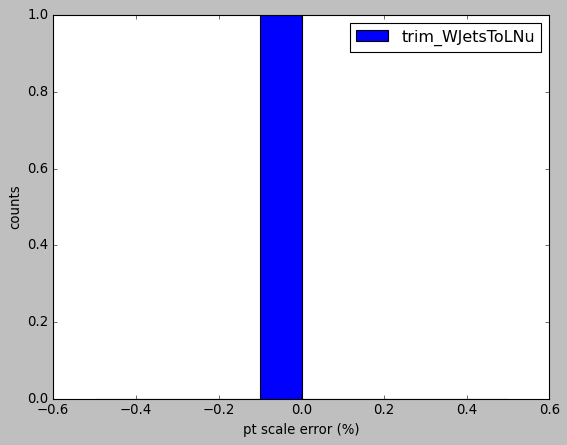

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WW_plus_ext1
number of simulations: 2372
expected yield: 1213
weights: min: 0.000340, max: 0.633196


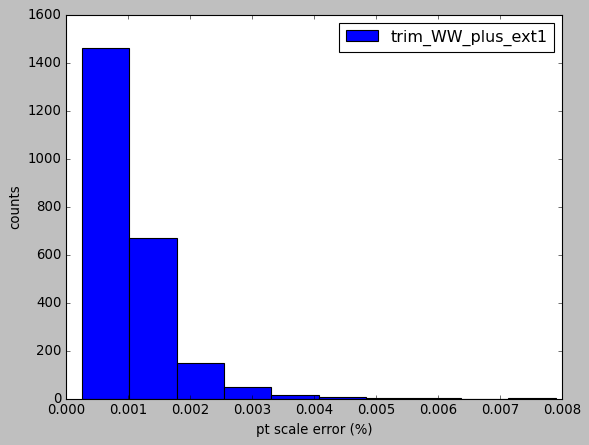

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WZTo2L2Q
number of simulations: 4124
expected yield: 31
weights: min: -0.017569, max: 0.017569


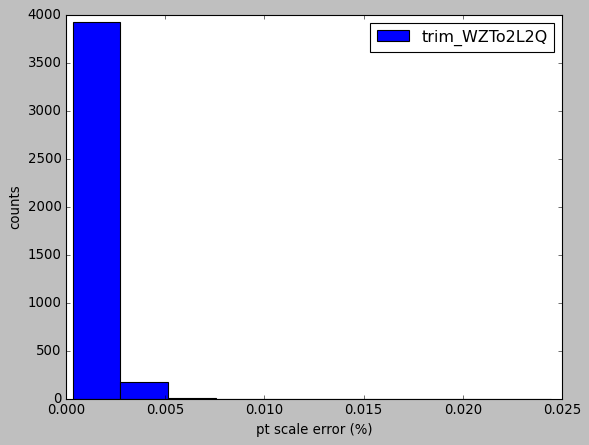

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WZTo3LNu
number of simulations: 6151
expected yield: 70
weights: min: -0.030155, max: 0.030163


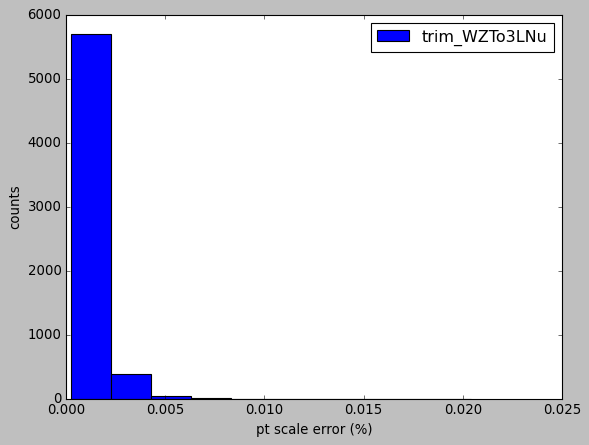

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZZTo2L2Q
number of simulations: 358
expected yield: 94
weights: min: 0.001013, max: 0.329821


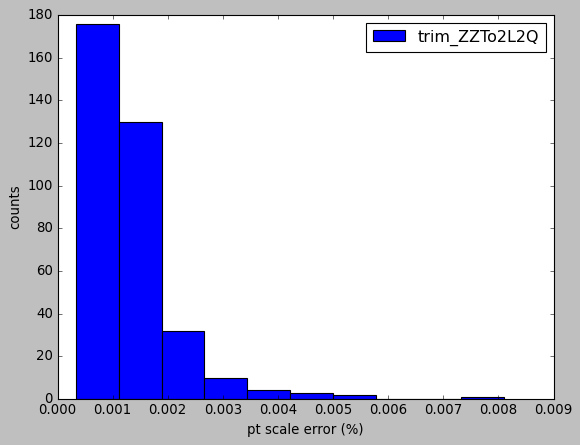

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZZTo2L2Nu
number of simulations: 31095
expected yield: 16
weights: min: 0.000000, max: 0.000647


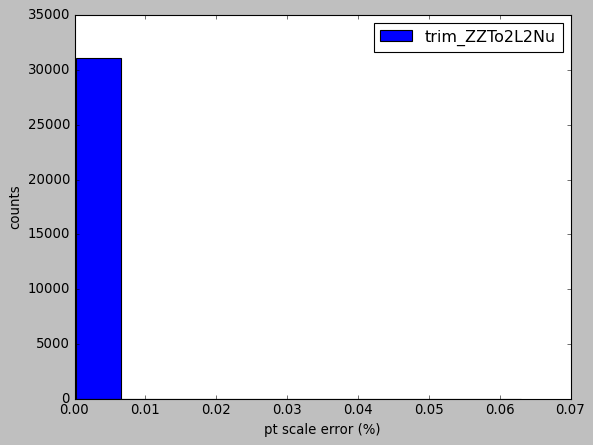

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZZTo4L
number of simulations: 2270
expected yield: 15
weights: min: 0.000005, max: 0.008738


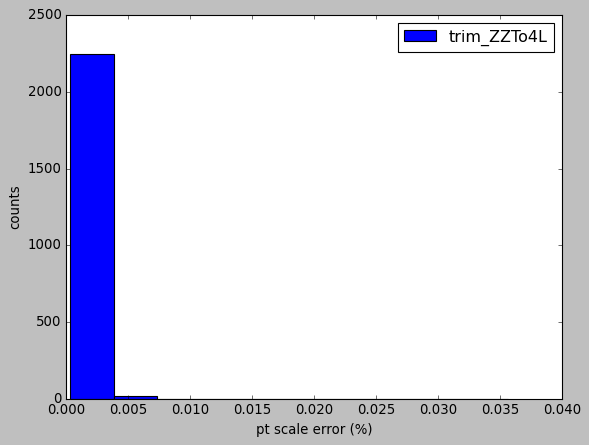

saved
Process: trim_ZToMuMu_M_50_120_theoryUnc_57files
number of simulations: 0
expected yield: 0


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

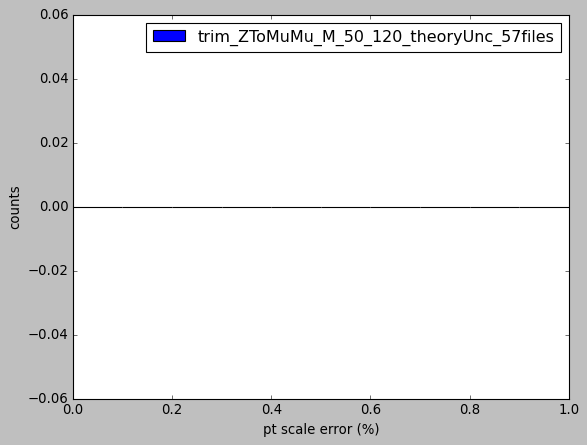

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_120_200_ext1_theoryUnc
number of simulations: 3442
expected yield: 651
weights: min: 0.000118, max: 0.242105


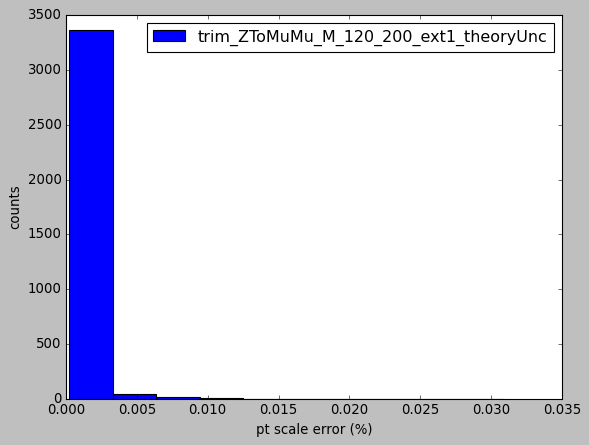

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_200_400_ext1_theoryUnc
number of simulations: 661344
expected yield: 34349
weights: min: 0.000000, max: 0.070300


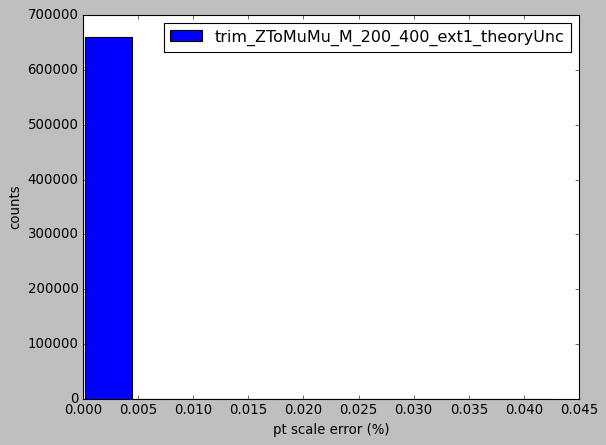

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_400_800_ext1_theoryUnc
number of simulations: 441363
expected yield: 4087
weights: min: 0.000000, max: 0.013836


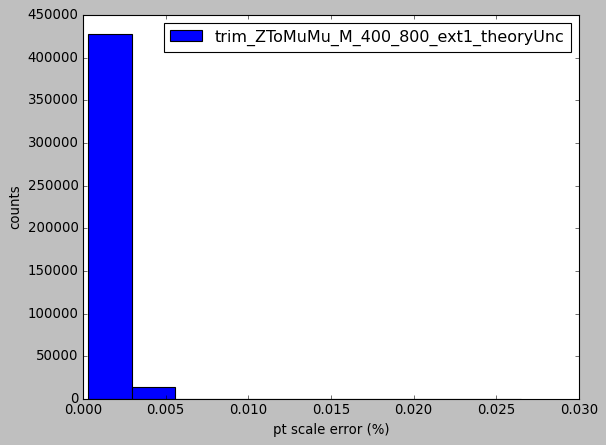

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_800_1400_theoryUnc
number of simulations: 58321
expected yield: 341
weights: min: 0.000000, max: 0.012470


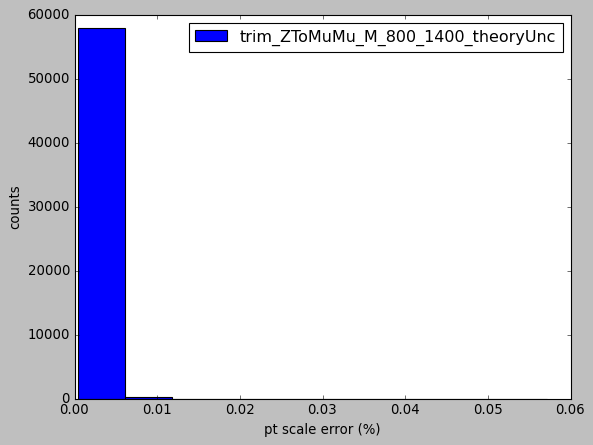

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_1400_2300_theoryUnc
number of simulations: 64175
expected yield: 31
weights: min: 0.000000, max: 0.000774


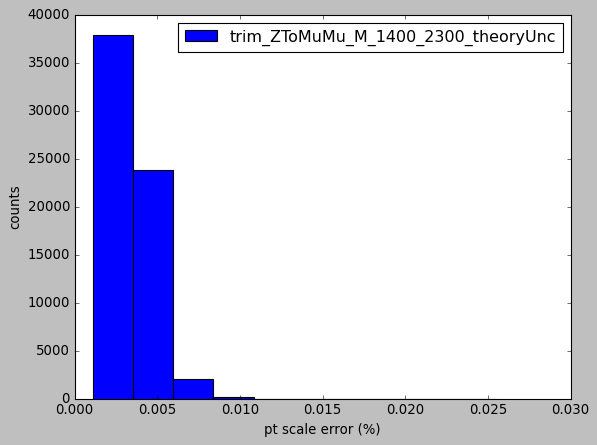

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_2300_3500_theoryUnc_2files
number of simulations: 35862
expected yield: 2
weights: min: 0.000000, max: 0.000157


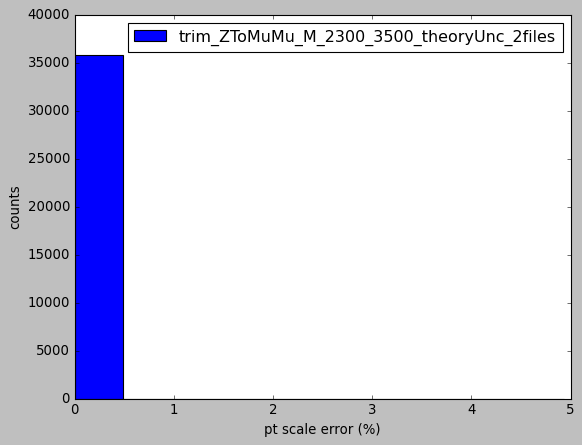

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_3500_4500_theoryUnc
number of simulations: 73400
expected yield: 0
weights: min: -0.000008, max: 0.000002


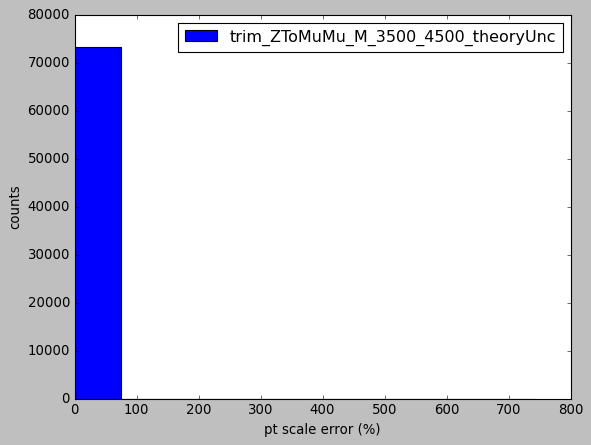

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_4500_6000_theoryUnc
number of simulations: 73811
expected yield: 0
weights: min: -0.000011, max: 0.000000


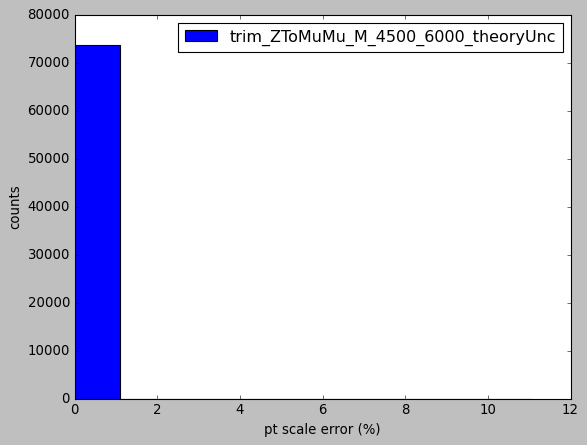

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZToMuMu_M_6000_Inf_theoryUnc
number of simulations: 72217
expected yield: 0
weights: min: -0.000000, max: 0.000000


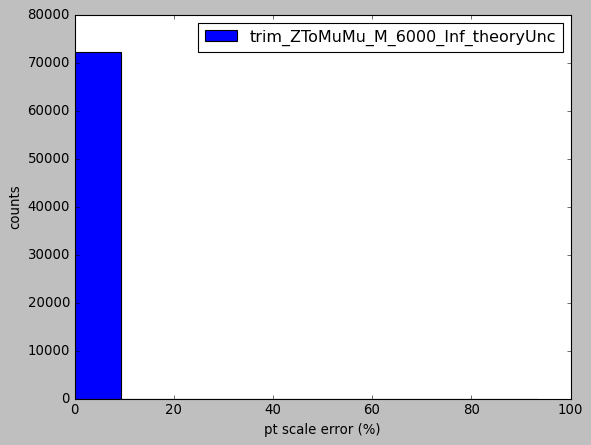

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_TTTo2L2Nu
number of simulations: 209034
expected yield: 8261
weights: min: 0.000000, max: 0.049299


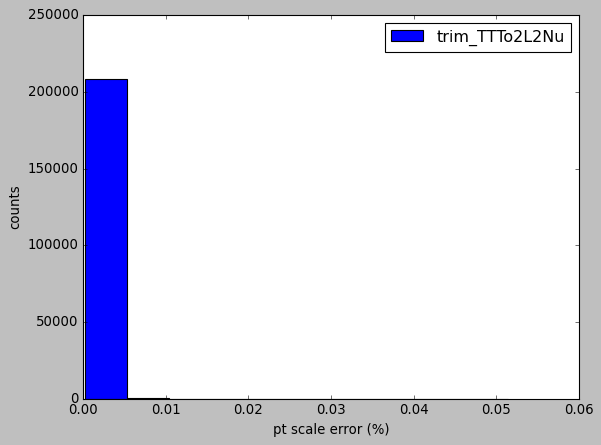

saved
Process: trim_TTToSemilepton
number of simulations: 100
expected yield: 8
weights: min: 0.000332, max: 0.104827


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

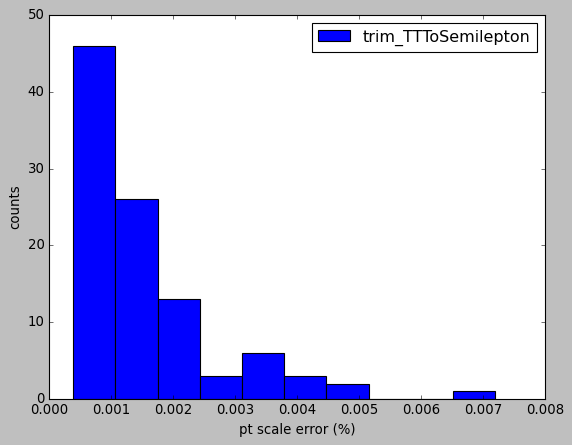

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tW_top_5f
number of simulations: 4677
expected yield: 590
weights: min: 0.000074, max: 0.155598


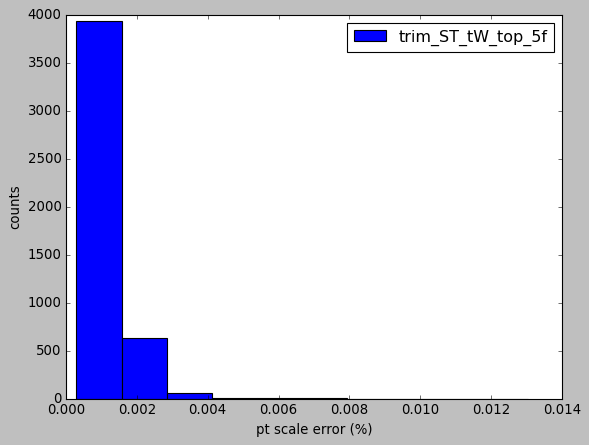

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tW_antitop_5f
number of simulations: 4726
expected yield: 593
weights: min: 0.000081, max: 0.156299


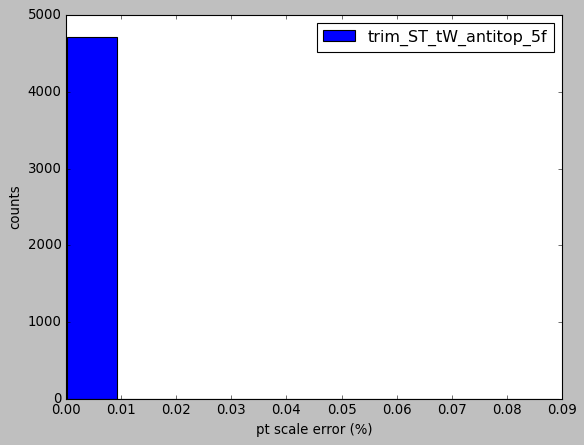

saved
Process: trim_ST_tchannel_top_4f
number of simulations: 8
expected yield: 0
weights: min: 0.043808, max: 0.073020


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

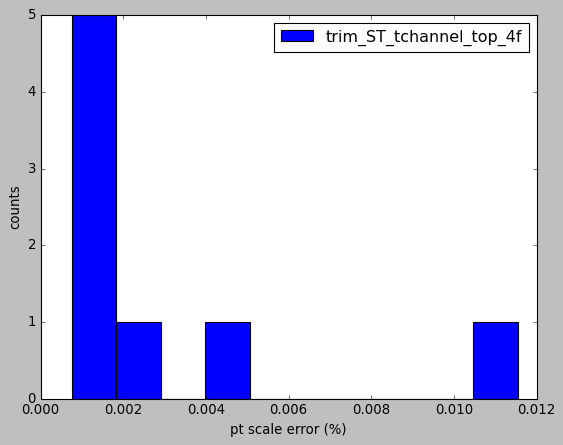

saved


/tmp/ipykernel_2175/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2175/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2175/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tchannel_antitop_4f
number of simulations: 7
expected yield: 0
weights: min: 0.031579, max: 0.078983


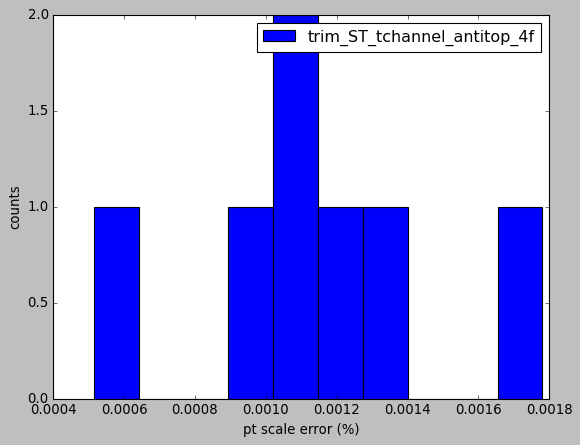

saved


Warning in <TNetXNGFile::Init>: file root://eoscms.cern.ch//eos/cms/store/group/phys_exotica/darkPhoton/schhibra/MLTechnique/RecoNTuples2016/v3/trim_WZTo2L2Q.root probably not closed, trying to recover
Info in <TNetXNGFile::Recover>: root://eoscms.cern.ch//eos/cms/store/group/phys_exotica/darkPhoton/schhibra/MLTechnique/RecoNTuples2016/v3/trim_WZTo2L2Q.root, recovered key TTree:tree at address 119409655
Warning in <TNetXNGFile::Init>: successfully recovered 1 keys


In [21]:
create_MCsamples_nu_info(DIR_INPUT, DIR_OUTPUT=mc_folder, 
                         trim_list=trim_list_16, columns_MC=columns_MC, columns_saving=columns_saving, columns_weight=columns_weight, 
                         mass_cut=mass_cut, ratioPT=ratioPT16, muonpt_scale=muonpt_scale_nu, 
                         poly5_mass=[], 
                         poly5_PI=[p0_PI, p1_PI, p2_PI, p3_PI, 0, 0]
                        )

# convert 2017

In [10]:
DIR_INPUT = '/eos/cms/store/group/phys_exotica/darkPhoton/schhibra/MLTechnique/RecoNTuples2017/v3/'
trim_list_17 = [
             'trim_WJetsToLNu_plus_ext1'  , 'trim_WZTo2L2Q'              , 'trim_WZTo3LNu'    , 'trim_WWTo2L2Nu_PSweights' ,
             'trim_ZZTo2L2Q'              , 'trim_ZZTo2L2Nu'             , 'trim_ZZTo4L_1star',
             'trim_ZToMuMu_M_50_120_52files', 'trim_genmass_ZToMuMu_M_120_200_ext1', 'trim_genmass_ZToMuMu_M_200_400_ext1', 'trim_genmass_ZToMuMu_M_400_800_ext1'     ,
             'trim_genmass_ZToMuMu_M_800_1400'    , 'trim_genmass_ZToMuMu_M_1400_2300'   , 'trim_genmass_ZToMuMu_M_2300_3500', 'trim_genmass_ZToMuMu_M_3500_4500'   , 
             'trim_genmass_ZToMuMu_M_4500_6000'   , 'trim_genmass_ZToMuMu_M_6000_Inf'    , 
             'trim_TTTo2L2Nu_PSweights'       , 'trim_TTToSemiLeptonic_PSweights_1star', 
             'trim_ST_tW_top_5f_PSweights', 'trim_ST_tW_antitop_5f_PSweights'      ,
             'trim_ST_tchannel_top_5f'    , 'trim_ST_tchannel_antitop_5f_PSweights', 'trim_ST_schannel_4f_PSweights', 
            ]

trim_list_data_17 = [  'trim_Run2017B_SM_DM', 'trim_Run2017C_SM_DM', 'trim_Run2017D_SM_DM', 
                    'trim_Run2017E_SM_DM','trim_Run2017F_SM_DM' ]
columns_MC = ['mcweight', 'puweight', 'exweight', 'trgweight', 
              'm1dB', 'm1dz', 'm1iso', 'm1pt', 'm1eta', 'm1phi', 'm1SF', 'm1SFErr',
              'm2dB', 'm2dz', 'm2iso', 'm2pt', 'm2eta', 'm2phi', 'm2SF', 'm2SFErr',
              'mass', 'dimuonpt', 'nbjets', 'nmu', 'genleadmupt']
columns_saving = ['leadmupt', 'subleadmupt', 'leadmueta', 'subleadmueta', 'delta_phi', 'mass',
                  'm1SF', 'm1SFErr', 'm2SF', 'm2SFErr', 
                  'dimuonpt', 'delta_R']
columns_weight = ['weight', 'ptweight', 'massweight', 'PIweight']

LUMINOSITY = 0
LUMINOSITY+=4793.96#/pb for Run2017B
LUMINOSITY+=9631.61#/pb for Run2017C
LUMINOSITY+=4247.68#/pb for Run2017D
LUMINOSITY+=9313.64#/pb for Run2017E
LUMINOSITY+=13539.04#/pb for Run2017F
print('total luminosity: %f'%(LUMINOSITY))

xsec_dict    = { 'trim_DYJetsToLL_M50'        : 6225., 
                 'trim_WJetsToLNu_plus_ext1'  : 61526.7, 
                 'trim_WWTo2L2Nu_PSweights'   : 10.48,
                 'trim_WZTo2L2Q'              : 6.331,
                 'trim_WZTo3LNu'              : 5.052, 
                 'trim_ZZTo2L2Q'              : 3.688, 
                 'trim_ZZTo2L2Nu'             : 0.5644, 
                 'trim_ZZTo4L_1star'          : 1.325, 
                 'trim_TTTo2L2Nu_PSweights'   : 88.29,
                 'trim_TTToSemiLeptonic_PSweights_1star': 365.34, 
                 'trim_ST_tW_top_5f_PSweights'          : 19.2,
                 'trim_ST_tW_antitop_5f_PSweights'      : 19.23, 
                 'trim_ST_tchannel_top_5f'    : 119.7,
                 'trim_ST_tchannel_antitop_5f_PSweights': 71.74, 
                 'trim_ST_schannel_4f_PSweights': 3.74,
                 'trim_ZToMuMu_M_50_120_52files': 2112.904,
                 'trim_genmass_ZToMuMu_M_120_200_ext1'  : 20.553,
                 'trim_genmass_ZToMuMu_M_200_400_ext1'  : 2.886,
                 'trim_genmass_ZToMuMu_M_400_800_ext1'  : 0.2517,
                 'trim_genmass_ZToMuMu_M_800_1400'    : 0.01707,
                 'trim_genmass_ZToMuMu_M_1400_2300'   : 0.001366,
                 'trim_genmass_ZToMuMu_M_2300_3500'   : 0.00008178,
                 'trim_genmass_ZToMuMu_M_3500_4500'   : 0.000003191,
                 'trim_genmass_ZToMuMu_M_4500_6000'   : 0.0000002787,
                 'trim_genmass_ZToMuMu_M_6000_Inf'    : 0.000000009569
               } # pb

mass_cut  = 200
muonpt_scale_nu  = 3.0
muonpt_scale_str = str(muonpt_scale_nu) 
mc_folder = './MC_2017_M%i_final_match_muonPTscale_%s/'%(mass_cut, muonpt_scale_str)

if not os.path.exists(mc_folder):
    os.makedirs(mc_folder)   

total luminosity: 41525.930000


Process: trim_WJetsToLNu_plus_ext1
number of simulations: 1
expected yield: 1
weights: min: 1.543481, max: 1.543481


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

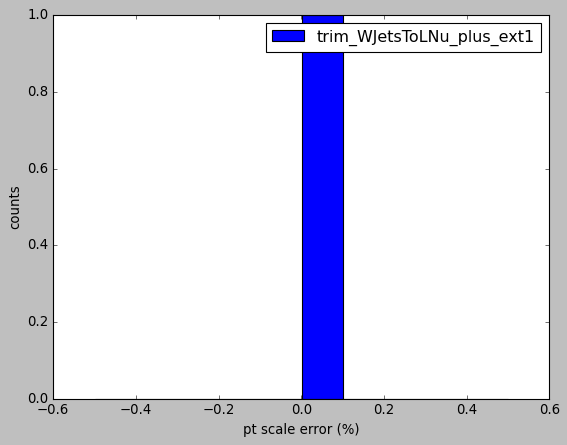

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WZTo2L2Q
number of simulations: 12653
expected yield: 114
weights: min: -0.025655, max: 0.025329


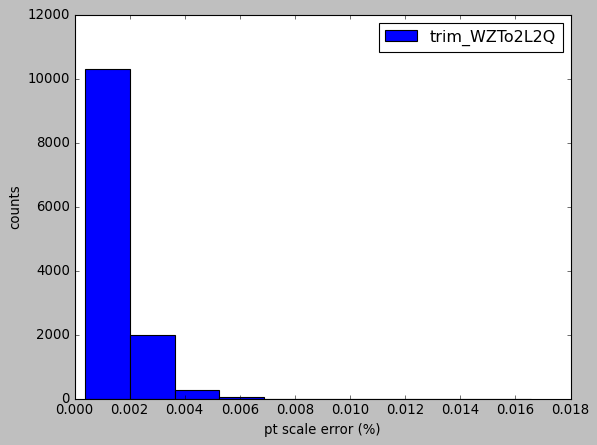

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WZTo3LNu
number of simulations: 5482
expected yield: 79
weights: min: -0.078745, max: 0.047438


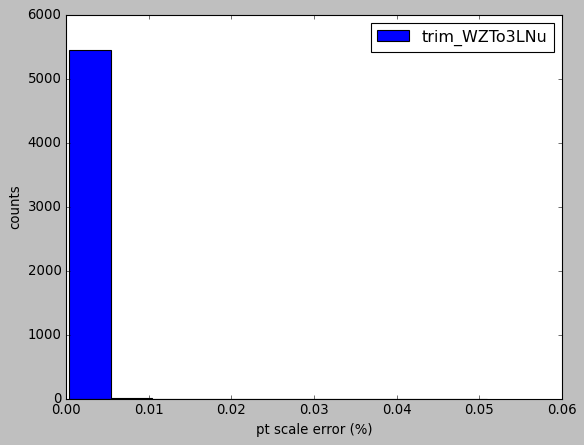

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_WWTo2L2Nu_PSweights
number of simulations: 5421
expected yield: 1192
weights: min: 0.001273, max: 0.340487


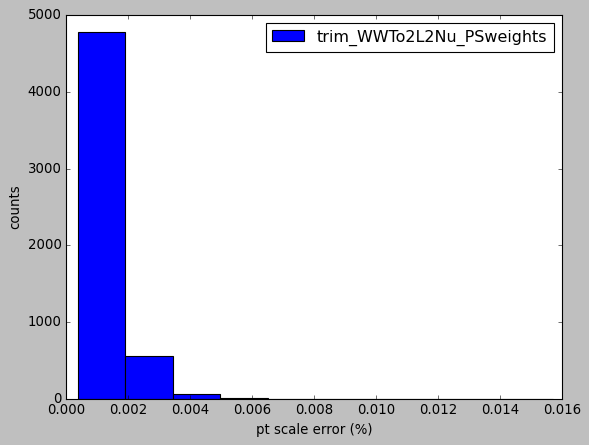

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZZTo2L2Q
number of simulations: 11780
expected yield: 60
weights: min: -0.013652, max: 0.021708


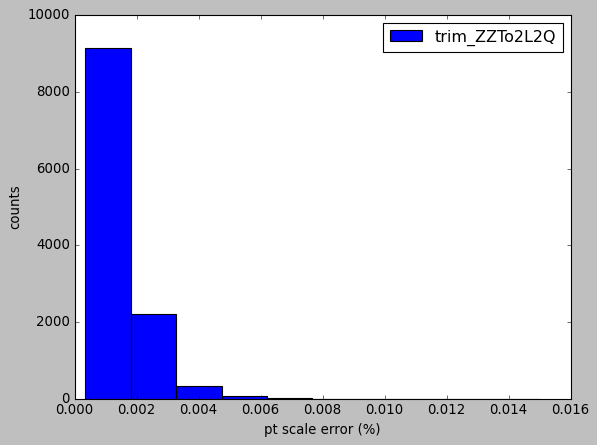

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZZTo2L2Nu
number of simulations: 6947
expected yield: 18
weights: min: -0.003412, max: 0.004170


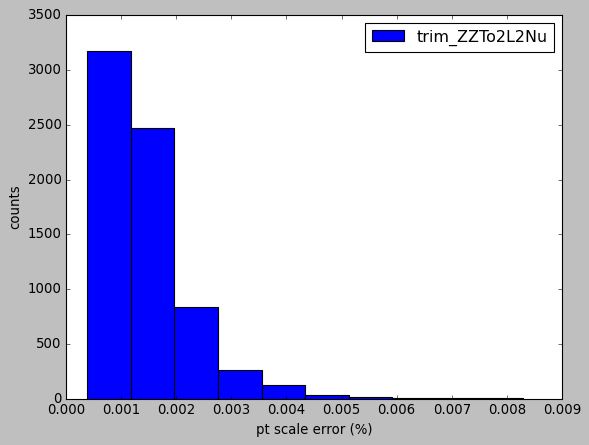

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ZZTo4L_1star
number of simulations: 17438
expected yield: 17
weights: min: -0.001074, max: 0.001675


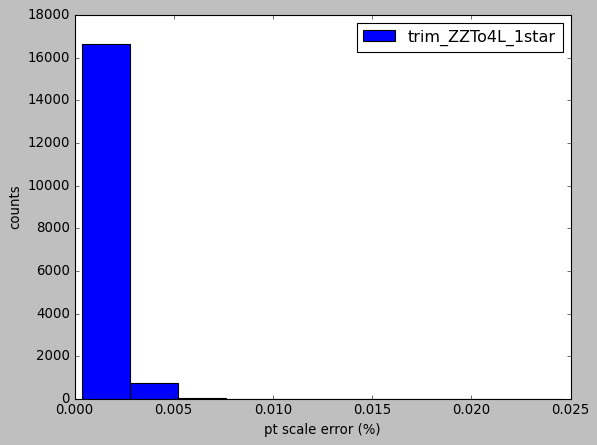

saved
Process: trim_ZToMuMu_M_50_120_52files
number of simulations: 0
expected yield: 0


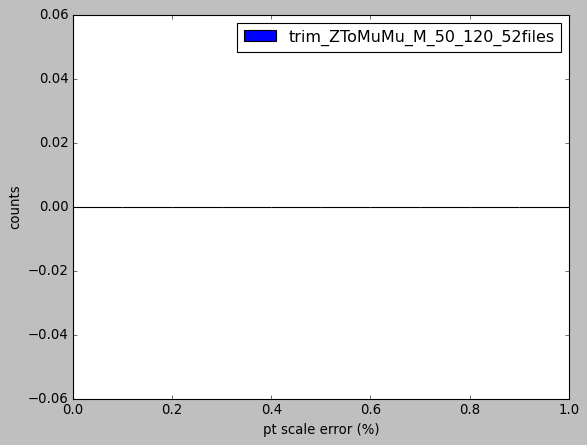

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_120_200_ext1
number of simulations: 4275
expected yield: 939
weights: min: -0.312934, max: 0.580555


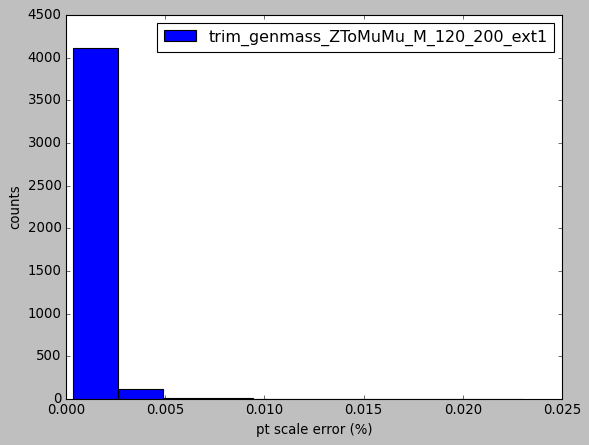

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_200_400_ext1
number of simulations: 669252
expected yield: 40736
weights: min: -0.094942, max: 0.196059


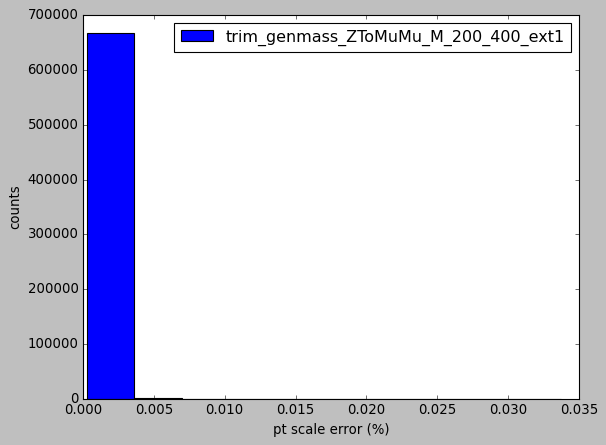

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_400_800_ext1
number of simulations: 460406
expected yield: 4827
weights: min: -0.016219, max: 0.046964


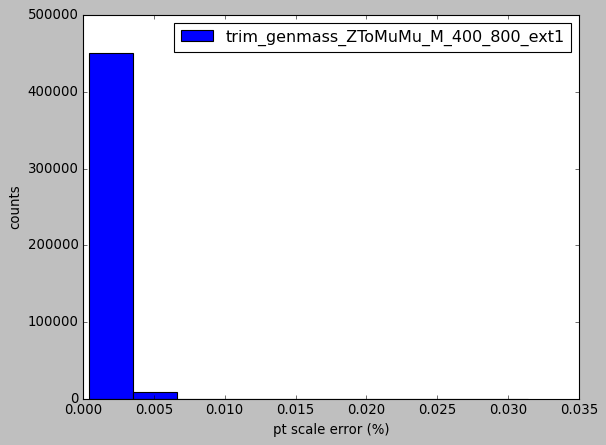

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_800_1400
number of simulations: 58115
expected yield: 403
weights: min: -0.010087, max: 0.017051


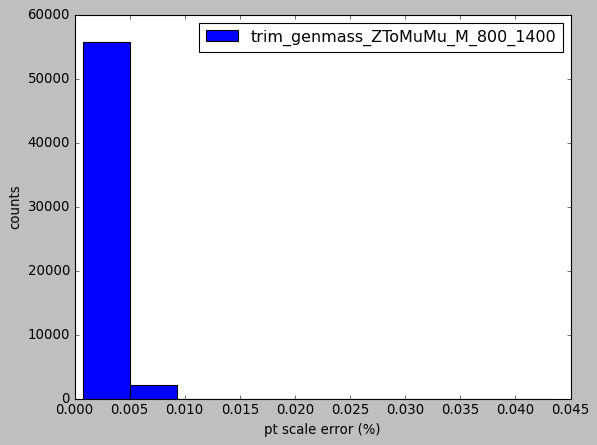

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_1400_2300
number of simulations: 67285
expected yield: 35
weights: min: -0.000760, max: 0.000975


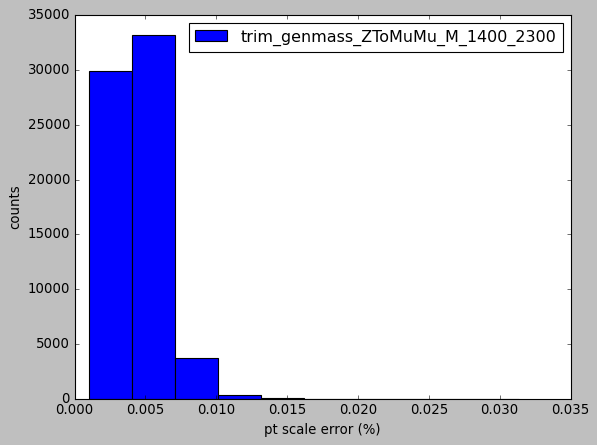

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_2300_3500
number of simulations: 71869
expected yield: 2
weights: min: -0.000046, max: 0.000063


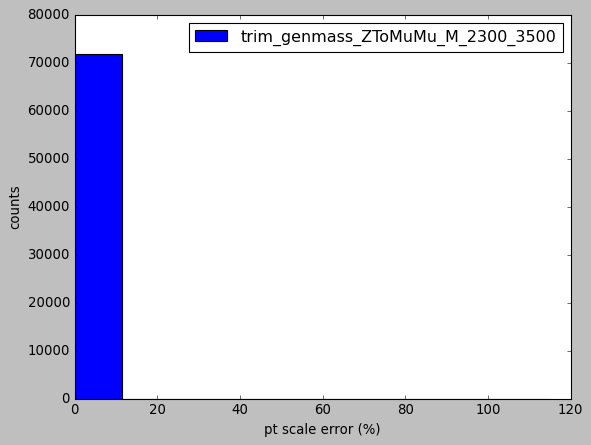

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_3500_4500
number of simulations: 72726
expected yield: 0
weights: min: -0.000036, max: 0.000003


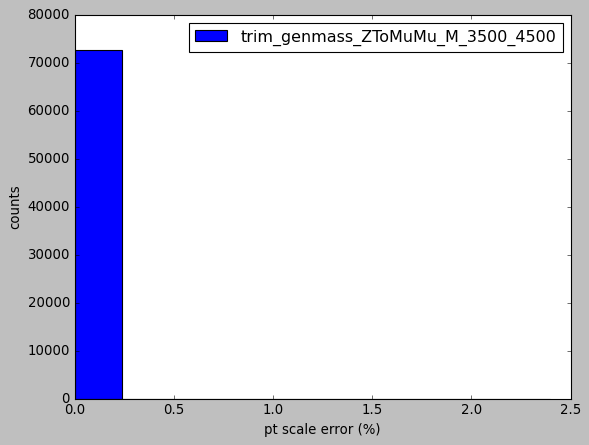

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_4500_6000
number of simulations: 72216
expected yield: 0
weights: min: -0.000064, max: 0.000000


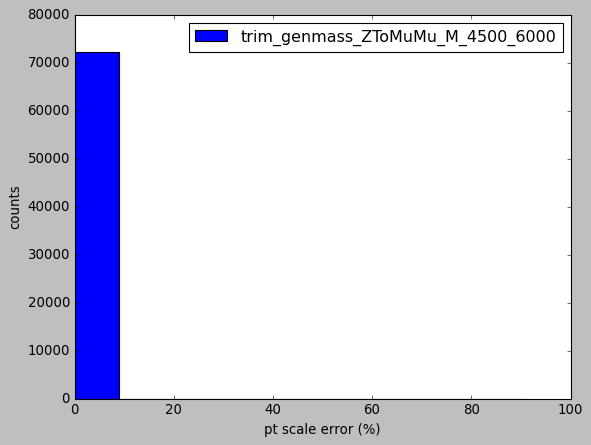

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_genmass_ZToMuMu_M_6000_Inf
number of simulations: 71486
expected yield: 0
weights: min: -0.000001, max: 0.000001


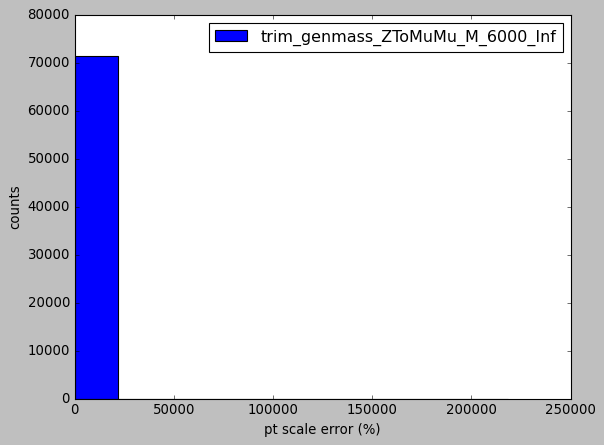

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_TTTo2L2Nu_PSweights
number of simulations: 176062
expected yield: 9309
weights: min: -0.088920, max: 0.088962


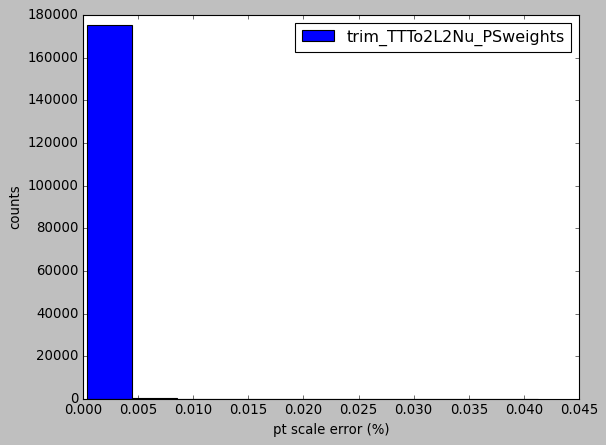

saved
Process: trim_TTToSemiLeptonic_PSweights_1star
number of simulations: 72
expected yield: 17
weights: min: -0.354951, max: 0.421453


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

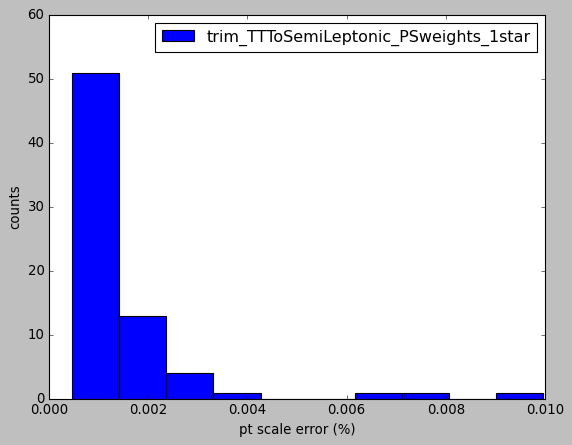

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tW_top_5f_PSweights
number of simulations: 4204
expected yield: 684
weights: min: -0.229392, max: 0.277566


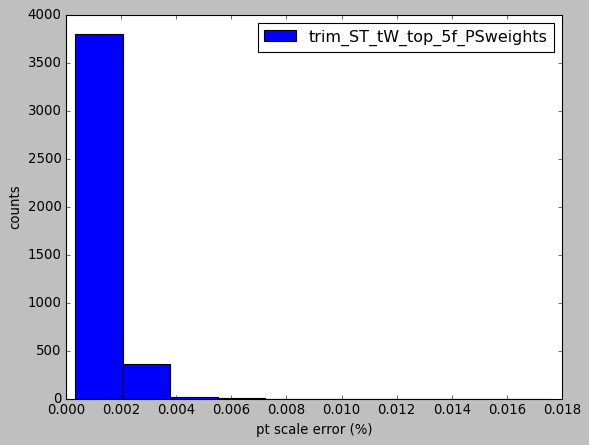

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tW_antitop_5f_PSweights
number of simulations: 4861
expected yield: 688
weights: min: -0.230758, max: 0.247114


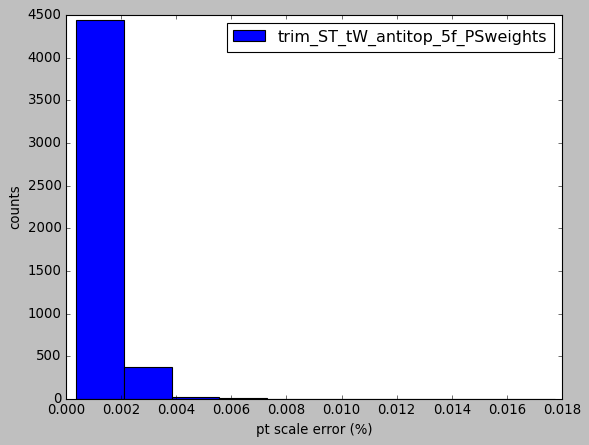

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tchannel_top_5f
number of simulations: 1
expected yield: 1
weights: min: 1.029208, max: 1.029208


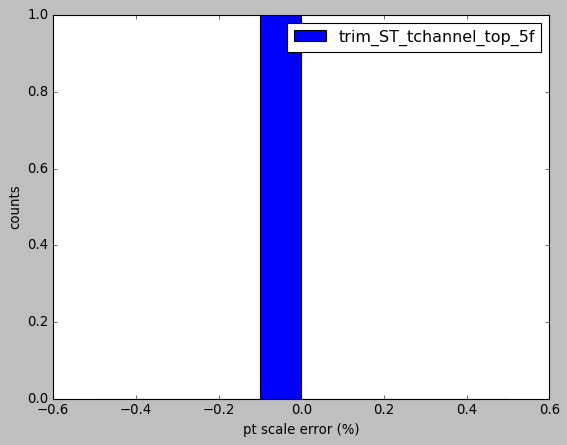

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_tchannel_antitop_5f_PSweights
number of simulations: 2
expected yield: 1
weights: min: 0.779236, max: 0.815993


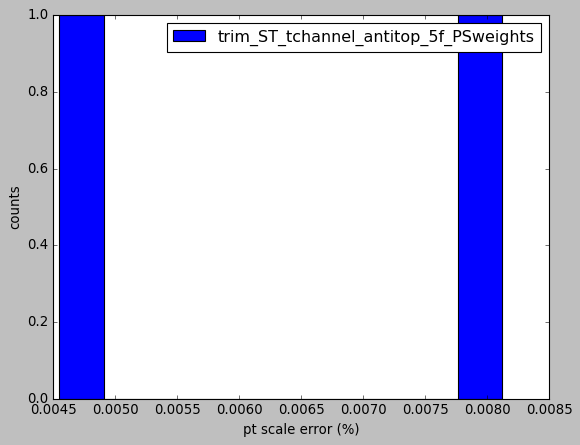

saved


/tmp/ipykernel_2002/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_2002/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_2002/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Process: trim_ST_schannel_4f_PSweights
number of simulations: 21
expected yield: 0
weights: min: -0.032338, max: 0.033504


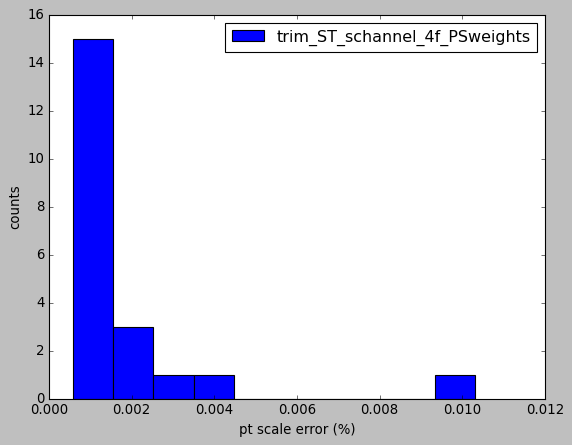

saved


In [21]:
create_MCsamples_nu_info(DIR_INPUT, DIR_OUTPUT=mc_folder, 
                         trim_list=trim_list_17, columns_MC=columns_MC, columns_saving=columns_saving, columns_weight=columns_weight, 
                         mass_cut=mass_cut, ratioPT=ratioPT17, muonpt_scale=muonpt_scale_nu, 
                         poly5_mass=[p0_17, p1_17, p2_17, p3_17, p4_17, p5_17], 
                         poly5_PI=[p0_PI, p1_PI, p2_PI, p3_PI, 0, 0]
                        )

# convert 2018

In [9]:
DIR_INPUT = '/eos/cms/store/group/phys_exotica/darkPhoton/schhibra/MLTechnique/RecoNTuples2018/v3/'
trim_list_18 = [
             'trim_WJetsToLNu'            , 'trim_WW'                    , 'trim_WZTo2L2Q'             , 'trim_WZTo3LNu'             , 
             'trim_ZZTo2L2Q'              , 'trim_ZZTo2L2Nu'             , 'trim_ZZTo4L'               ,
             'trim_ZToMuMu_M_50_120' ,    'trim_ZToMuMu_M_120_200_ext1', 'trim_ZToMuMu_M_200_400_ext1', 'trim_ZToMuMu_M_400_800_ext1' ,
             'trim_ZToMuMu_M_800_1400'    , 'trim_ZToMuMu_M_1400_2300'   , 'trim_ZToMuMu_M_2300_3500'  , 'trim_ZToMuMu_M_3500_4500'   , 
             'trim_ZToMuMu_M_4500_6000'   , 'trim_ZToMuMu_M_6000_Inf'    , 
             'trim_TTTo2L2Nu_1star'       , 'trim_TTToSemiLeptonic_1star', 
             'trim_ST_tW_top_5f'          , 'trim_ST_tW_antitop_5f'      ,
             'trim_ST_tchannel_top_5f'    , 'trim_ST_tchannel_antitop_5f', 'trim_ST_schannel_4f', 
            ]
trim_list_data = ['trim_Run2018A_SM_DM', 'trim_Run2018B_SM_DM', 'trim_Run2018C_SM_DM', 'trim_Run2018D_SM_DM']

columns_MC = ['mcweight', 'puweight', 'exweight', 'trgweight', 
              'm1dB', 'm1dz', 'm1iso', 'm1pt', 'm1eta', 'm1phi', 'm1SF', 'm1SFErr',
              'm2dB', 'm2dz', 'm2iso', 'm2pt', 'm2eta', 'm2phi', 'm2SF', 'm2SFErr',
              'mass', 'dimuonpt', 'nbjets', 'nmu', 'genleadmupt']
columns_saving = ['leadmupt', 'subleadmupt', 'leadmueta', 'subleadmueta', 'delta_phi', 'mass',
                  'm1SF', 'm1SFErr', 'm2SF', 'm2SFErr', 
                  'dimuonpt', 'delta_R']
columns_weight = ['weight', 'ptweight', 'massweight', 'PIweight']

LUMINOSITY   = 13977.334 + 7057.8 + 6894.8 + 31742.6 # pb-1 [RunA, RunB, RunC, RunD]
xsec_dict    = { 'trim_DYJetsToLL_M50'        : 6225., 
                 'trim_WJetsToLNu'            : 61526.7, 
                 'trim_WW'                    : 115.,
                 'trim_WZTo2L2Q'              : 6.331,
                 'trim_WZTo3LNu'              : 5.052, 
                 'trim_ZZTo2L2Q'              : 3.688, 
                 'trim_ZZTo2L2Nu'             : 0.5644, 
                 'trim_ZZTo4L'                : 1.325, 
                 'trim_TTTo2L2Nu_1star'       : 88.29,
                 'trim_TTToSemiLeptonic_1star': 365.34, 
                 'trim_ST_tW_top_5f'          : 19.2,
                 'trim_ST_tW_antitop_5f'      : 19.23, 
                 'trim_ST_tchannel_top_5f'    : 119.7,
                 'trim_ST_tchannel_antitop_5f': 71.74, 
                 'trim_ST_schannel_4f'        : 3.74,
                 'trim_ZToMuMu_M_50_120'      : 2112.904,
                 'trim_ZToMuMu_M_120_200_ext1': 20.553,
                 'trim_ZToMuMu_M_200_400_ext1': 2.886,
                 'trim_ZToMuMu_M_400_800_ext1': 0.2517,
                 'trim_ZToMuMu_M_800_1400'    : 0.01707,
                 'trim_ZToMuMu_M_1400_2300'   : 0.001366,
                 'trim_ZToMuMu_M_2300_3500'   : 0.00008178,
                 'trim_ZToMuMu_M_3500_4500'   : 0.000003191,
                 'trim_ZToMuMu_M_4500_6000'   : 0.0000002787,
                 'trim_ZToMuMu_M_6000_Inf'    : 0.000000009569
               } # pb

mass_cut  = 200
muonpt_scale_nu  = -3.0
muonpt_scale_str = str(muonpt_scale_nu) 
mc_folder = './MC_2018_M%i_final_match_muonPTscale_%s/'%(mass_cut, muonpt_scale_str)

if not os.path.exists(mc_folder):
    os.makedirs(mc_folder)

Process: trim_WJetsToLNu
number of simulations: 2
expected yield: 89
weights: min: 31.304344, max: 57.724500


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

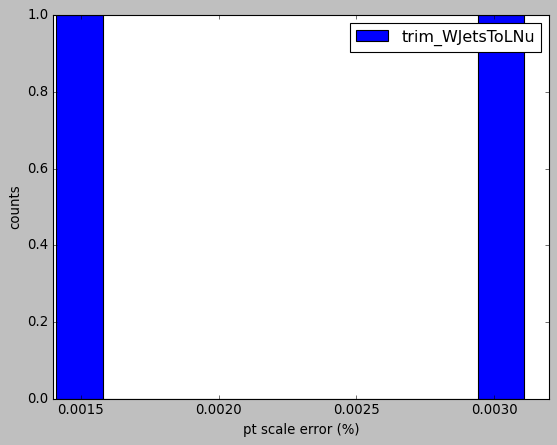

saved
Process: trim_WW
number of simulations: 2038
expected yield: 2211
weights: min: 0.012027, max: 1.928669


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

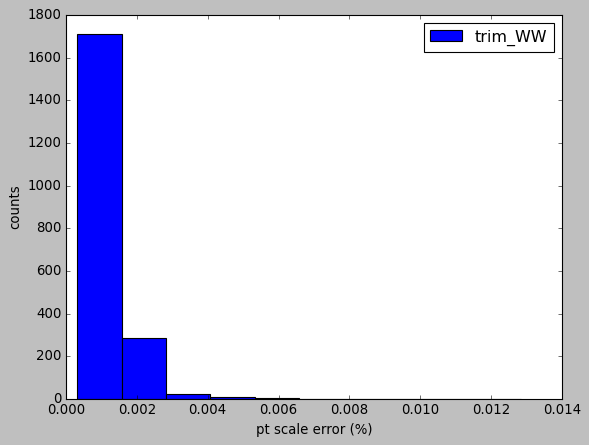

saved
Process: trim_WZTo2L2Q
number of simulations: 12723
expected yield: 164
weights: min: -0.152774, max: 0.153057


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

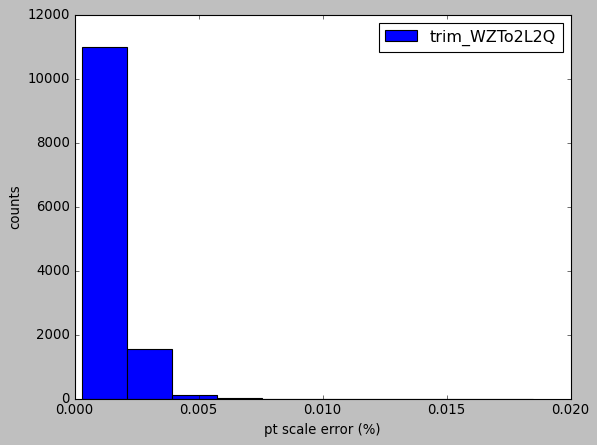

saved
Process: trim_WZTo3LNu
number of simulations: 5730
expected yield: 116
weights: min: -0.097134, max: 0.275385


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

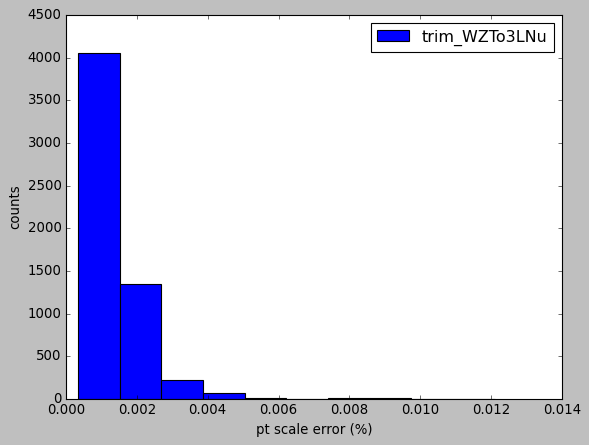

saved
Process: trim_ZZTo2L2Q
number of simulations: 11740
expected yield: 86
weights: min: -0.045783, max: 0.116082


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

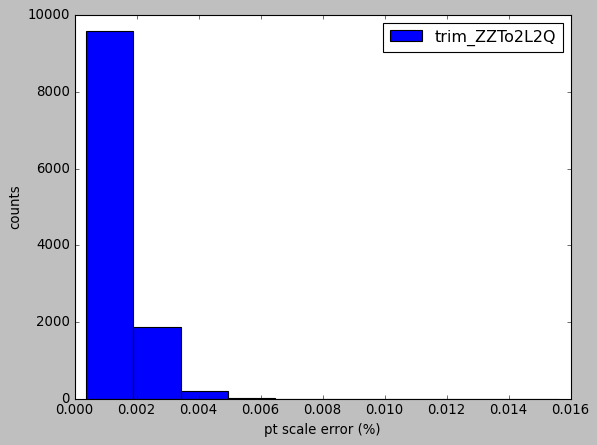

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZZTo2L2Nu
number of simulations: 38056
expected yield: 26
weights: min: -0.001016, max: 0.006545


/tmp/ipykernel_551/383441034.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['ptweight'] = (pddf_sel['genleadmupt'].to_numpy()<=0)*np.ones_like(pddf_sel['mass'].to_numpy()) + (pddf_sel['genleadmupt'].to_numpy()>0)*np.array([ratioPT[i] for i in pddf_sel['ptweight_idx'].to_numpy()])
/tmp/ipykernel_551/383441034.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['massweight'] = np.ones_like(pddf_sel['ptweight'])
/tmp/ipykernel_551/383441034.py:37: SettingWithCopyWarning: 
A value is tr

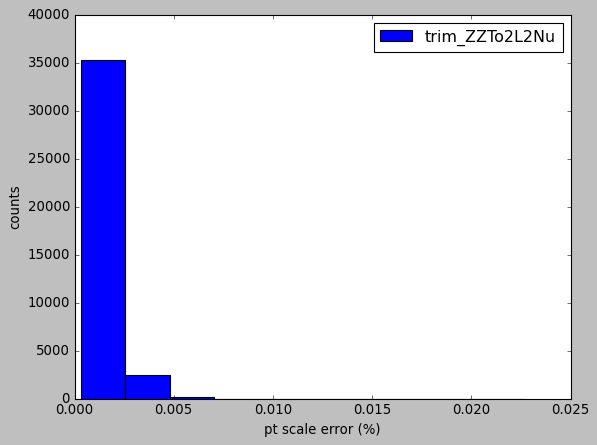

saved
Process: trim_ZZTo4L
number of simulations: 2135
expected yield: 26
weights: min: 0.000365, max: 0.045558


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

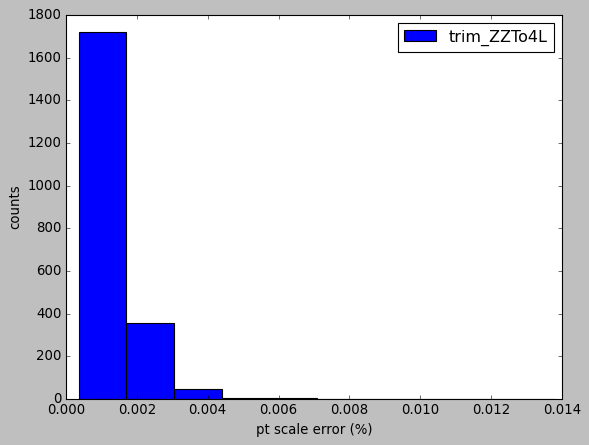

saved
Process: trim_ZToMuMu_M_50_120
number of simulations: 0
expected yield: 0


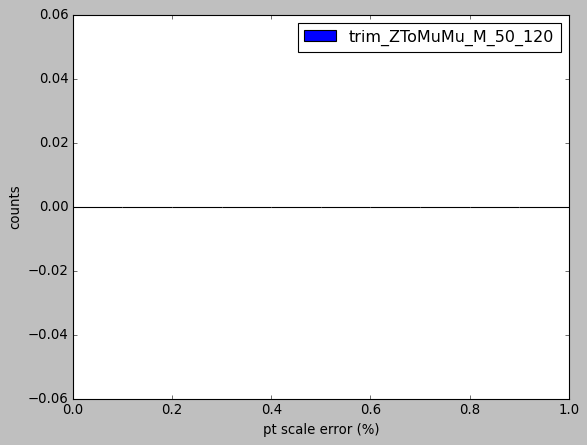

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_120_200_ext1
number of simulations: 2818
expected yield: 933
weights: min: -0.411262, max: 1.707338


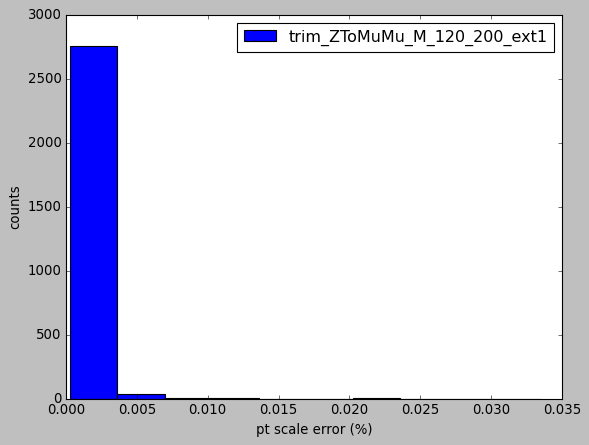

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_200_400_ext1
number of simulations: 648890
expected yield: 61247
weights: min: -0.259103, max: 3.252290


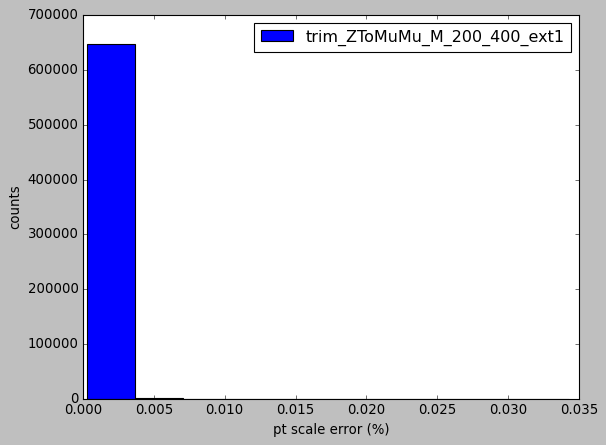

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_400_800_ext1
number of simulations: 463885
expected yield: 7218
weights: min: -0.029941, max: 0.276063


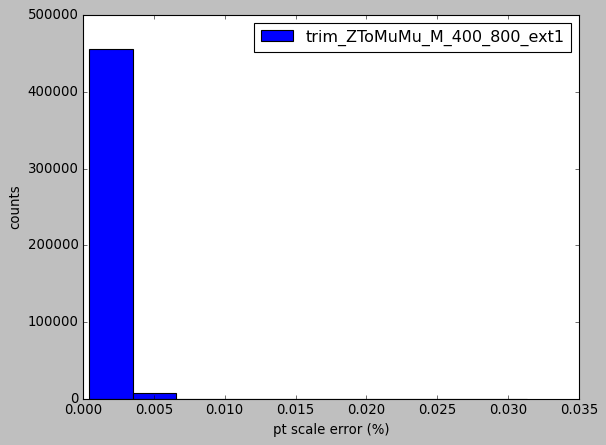

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_800_1400
number of simulations: 58515
expected yield: 587
weights: min: -0.014407, max: 0.326579


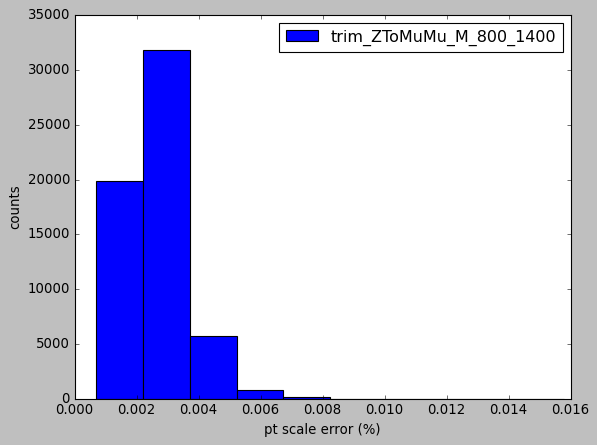

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_1400_2300
number of simulations: 67396
expected yield: 51
weights: min: -0.000848, max: 0.008995


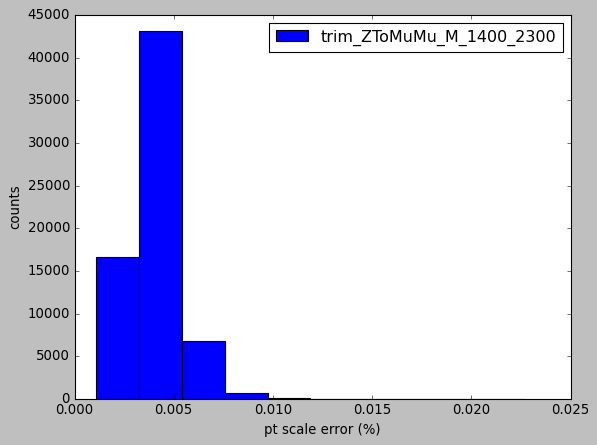

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_2300_3500
number of simulations: 71550
expected yield: 3
weights: min: -0.000062, max: 0.000430


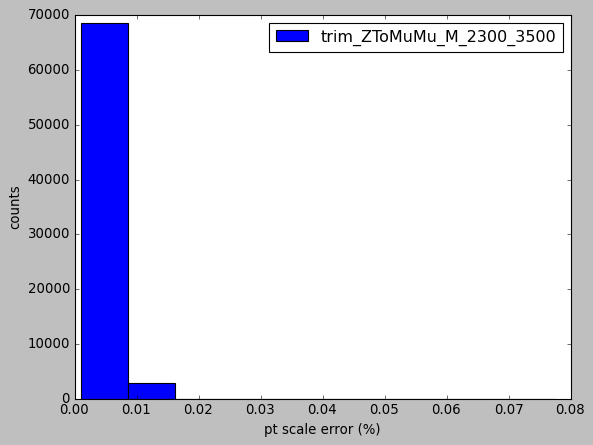

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_3500_4500
number of simulations: 73057
expected yield: 0
weights: min: -0.000002, max: 0.000011


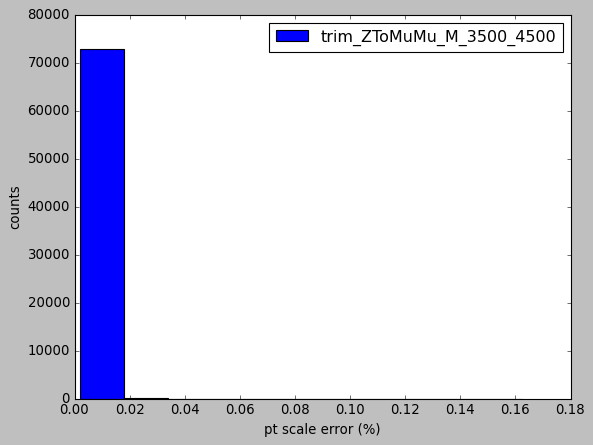

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_4500_6000
number of simulations: 72313
expected yield: 0
weights: min: -0.000009, max: 0.000008


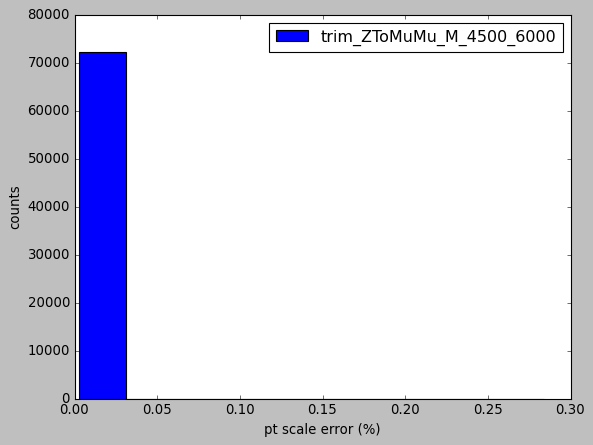

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ZToMuMu_M_6000_Inf
number of simulations: 72027
expected yield: 0
weights: min: -0.000000, max: 0.000000


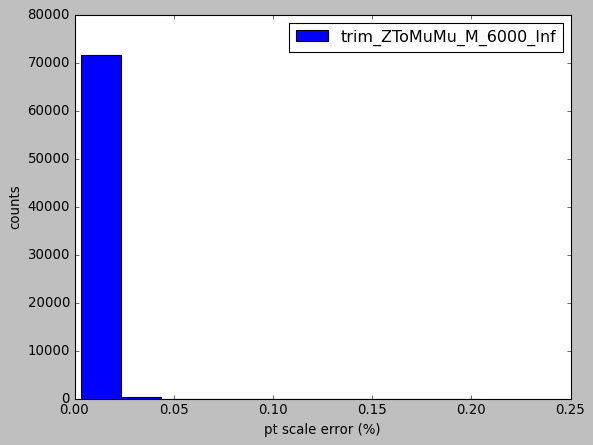

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_TTTo2L2Nu_1star
number of simulations: 51369
expected yield: 13552
weights: min: -0.454807, max: 3.373494


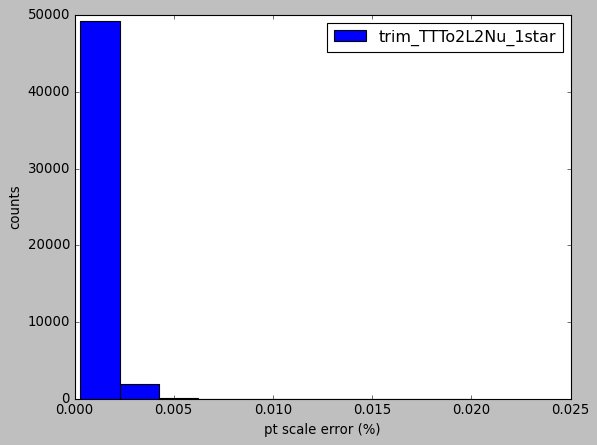

saved
Process: trim_TTToSemiLeptonic_1star
number of simulations: 60
expected yield: 21
weights: min: 0.041487, max: 0.656154


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

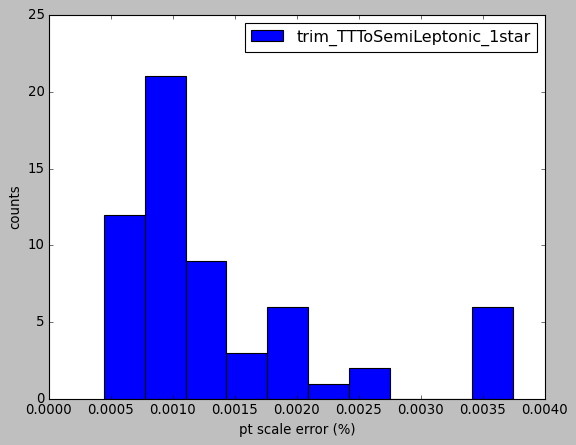

saved
Process: trim_ST_tW_top_5f
number of simulations: 6619
expected yield: 986
weights: min: -0.260305, max: 1.396538


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

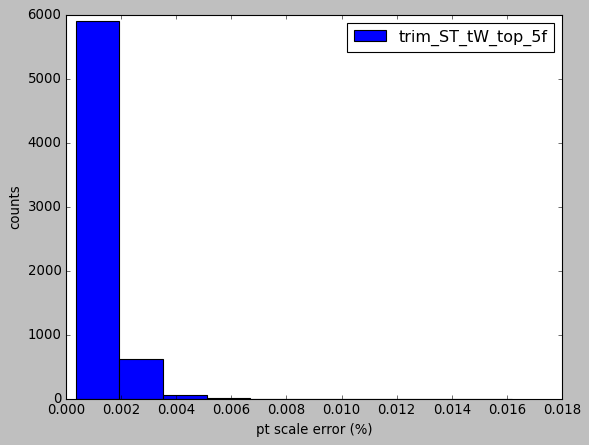

saved


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Process: trim_ST_tW_antitop_5f
number of simulations: 4863
expected yield: 951
weights: min: -0.289511, max: 0.701580


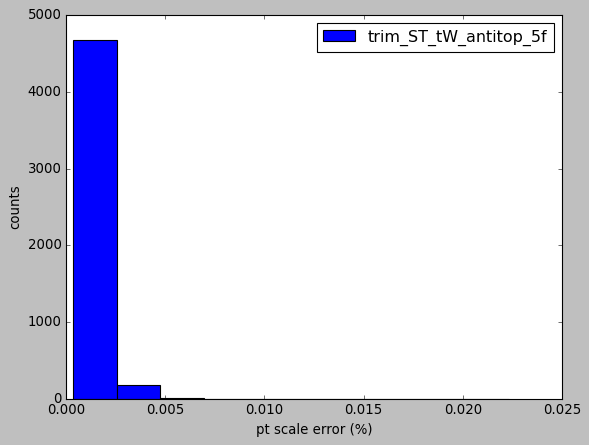

saved
Process: trim_ST_tchannel_top_5f
number of simulations: 2
expected yield: 1
weights: min: 0.151575, max: 1.295403


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

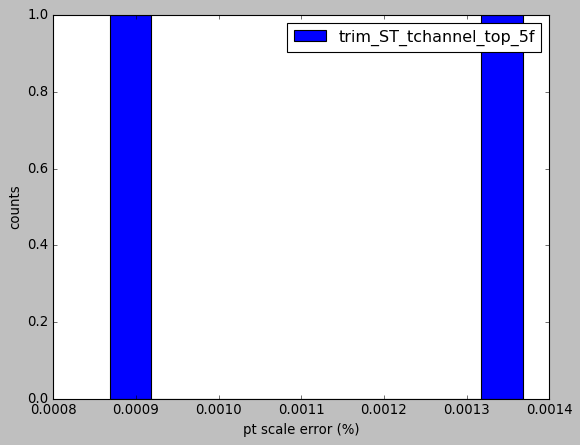

saved
Process: trim_ST_tchannel_antitop_5f
number of simulations: 2
expected yield: 2
weights: min: 1.145307, max: 1.475318


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

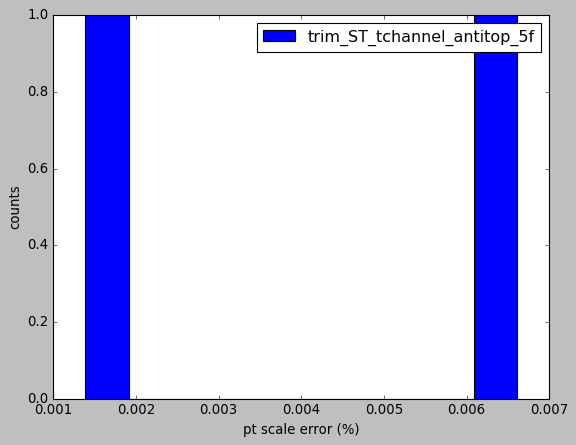

saved
Process: trim_ST_schannel_4f
number of simulations: 18
expected yield: 0
weights: min: -0.026756, max: 0.024535


/tmp/ipykernel_551/383441034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['delta_phi']   = DeltaPhi(pddf_sel['m1phi'].to_numpy(), pddf_sel['m2phi'].to_numpy())
/tmp/ipykernel_551/383441034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_sel['leadmupt']    = pddf_sel['m1pt']*(pddf_sel['m1pt']>=pddf_sel['m2pt'])  + pddf_sel['m2pt']*(pddf_sel['m1pt']<pddf_sel['m2pt'])
/tmp/ipykernel_551/383441034.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

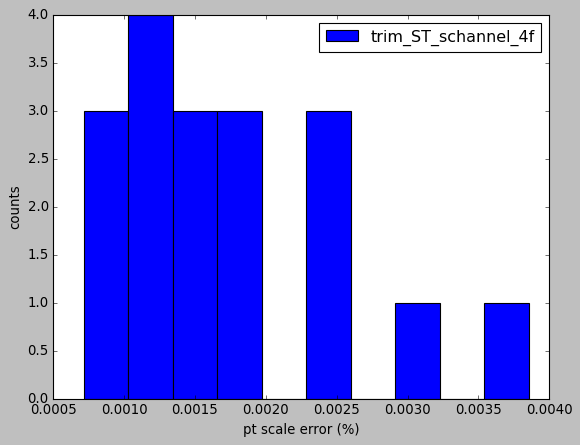

saved


In [33]:
create_MCsamples_nu_info(DIR_INPUT, DIR_OUTPUT=mc_folder, 
                         trim_list=trim_list_18, columns_MC=columns_MC, columns_saving=columns_saving, columns_weight=columns_weight, 
                         mass_cut=mass_cut, ratioPT=ratioPT17, muonpt_scale=muonpt_scale_nu, 
                         poly5_mass=[p0_18, p1_18, p2_18, p3_18, p4_18, p5_18], 
                         poly5_PI=[p0_PI, p1_PI, p2_PI, p3_PI, 0, 0]
                        )

## check out datasets 

In [12]:
trim_list={}

In [13]:
REF, W_REF, Y_REF, K_REF = {}, {}, {}, {}
ratios = {}
ratios_after_weights_selection = {}

In [14]:
trim_list['2016']=trim_list_16
ratios_after_weights_selection['2016'] = {}
REF['2016'] = {}
W_REF['2016'] = {}
Y_REF['2016'] = {}
K_REF['2016'] = {}
ratios['2016'] = {}

In [15]:
trim_list['2017']=trim_list_17
ratios_after_weights_selection['2017'] = {}
REF['2017'] = {}
W_REF['2017'] = {}
Y_REF['2017'] = {}
K_REF['2017'] = {}
ratios['2017'] = {}

In [16]:
trim_list['2018']=trim_list_18
ratios_after_weights_selection['2018'] = {}
REF['2018'] = {}
W_REF['2018'] = {}
Y_REF['2018'] = {}
K_REF['2018'] = {}
ratios['2018'] = {}

In [36]:
year = '2018'
for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
    mc_folder='./MC_%s_M200_final_match_muonPTscale_%s/'%(year,nu_str)
    REF[year][nu_str], W_REF[year][nu_str], Y_REF[year][nu_str], K_REF[year][nu_str] = Read_from_h5(mc_folder, trim_list[year], labels_dict, 
                                                                                                    read_keys=['leadmupt', 'subleadmupt', 'leadmueta', 'subleadmueta', 'delta_phi', 'mass', 'weight'], 
                                                                                                    isdata=False)

trim_WJetsToLNu
trim_WW
trim_WZTo2L2Q
trim_WZTo3LNu
trim_ZZTo2L2Q
trim_ZZTo2L2Nu
trim_ZZTo4L
trim_ZToMuMu_M_120_200_ext1
trim_ZToMuMu_M_200_400_ext1
trim_ZToMuMu_M_400_800_ext1
trim_ZToMuMu_M_800_1400
trim_ZToMuMu_M_1400_2300
trim_ZToMuMu_M_2300_3500
trim_ZToMuMu_M_3500_4500
trim_ZToMuMu_M_4500_6000
trim_ZToMuMu_M_6000_Inf
trim_TTTo2L2Nu_1star
trim_TTToSemiLeptonic_1star
trim_ST_tW_top_5f
trim_ST_tW_antitop_5f
trim_ST_tchannel_top_5f
trim_ST_tchannel_antitop_5f
trim_ST_schannel_4f
trim_WJetsToLNu
trim_WW
trim_WZTo2L2Q
trim_WZTo3LNu
trim_ZZTo2L2Q
trim_ZZTo2L2Nu
trim_ZZTo4L
trim_ZToMuMu_M_120_200_ext1
trim_ZToMuMu_M_200_400_ext1
trim_ZToMuMu_M_400_800_ext1
trim_ZToMuMu_M_800_1400
trim_ZToMuMu_M_1400_2300
trim_ZToMuMu_M_2300_3500
trim_ZToMuMu_M_3500_4500
trim_ZToMuMu_M_4500_6000
trim_ZToMuMu_M_6000_Inf
trim_TTTo2L2Nu_1star
trim_TTToSemiLeptonic_1star
trim_ST_tW_top_5f
trim_ST_tW_antitop_5f
trim_ST_tchannel_top_5f
trim_ST_tchannel_antitop_5f
trim_ST_schannel_4f
trim_WJetsToLNu
trim_WW
trim

In [39]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- NumPy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=0)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights, axis=0)
    return (average, variance)

for year in ['2018']:
    print(K_REF[year]['0.0'])
    average, variance= weighted_avg_and_std(values=REF[year]['0.0'], weights=W_REF[year]['0.0'][:, 0],)
    print(average, variance)
    '''print(np.average(REF[year]['0.0'], weights=W_REF[year]['0.0'][:, 0],
                     #weights=np.stack([W_REF[year]['0.0'][:, 0] for _ in range(6)], axis=1), 
                     axis=0))
    print(np.average(REF[year]['0.0'], weights=W_REF[year]['0.0'][:, 0],
                     #weights=np.stack([W_REF[year]['0.0'][:, 0] for _ in range(6)], axis=1), 
                     axis=0))'''

['leadmupt' 'subleadmupt' 'leadmueta' 'subleadmueta' 'delta_phi' 'mass']
[ 1.42025823e+02  1.11705495e+02 -9.76846883e-04 -7.98511812e-04
 -2.03257011e-03  2.87895636e+02] [4.03458111e+03 2.55117576e+03 1.04282100e+00 1.04527193e+00
 8.34918949e+00 1.32496084e+04]


In [38]:
# values used to standardize datasets (from 2018 only)
average, variance

(array([ 1.42025823e+02,  1.11705495e+02, -9.76846883e-04, -7.98511812e-04,
        -2.03257011e-03,  2.87895636e+02]),
 array([4.03458111e+03, 2.55117576e+03, 1.04282100e+00, 1.04527193e+00,
        8.34918949e+00, 1.32496084e+04]))

/tmp/ipykernel_787/3896679310.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_787/3896679310.py:21: RuntimeWarning: invalid value encountered in true_divide
  ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
/tmp/ipykernel_787/3896679310.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_787/3896679310.py:21: RuntimeWarning: invalid value encountered in true_divide
  ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
/tmp/ipykernel_787/3896679310.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_787/3896679310.py:21: RuntimeWarning: invalid value encountered in true_divide


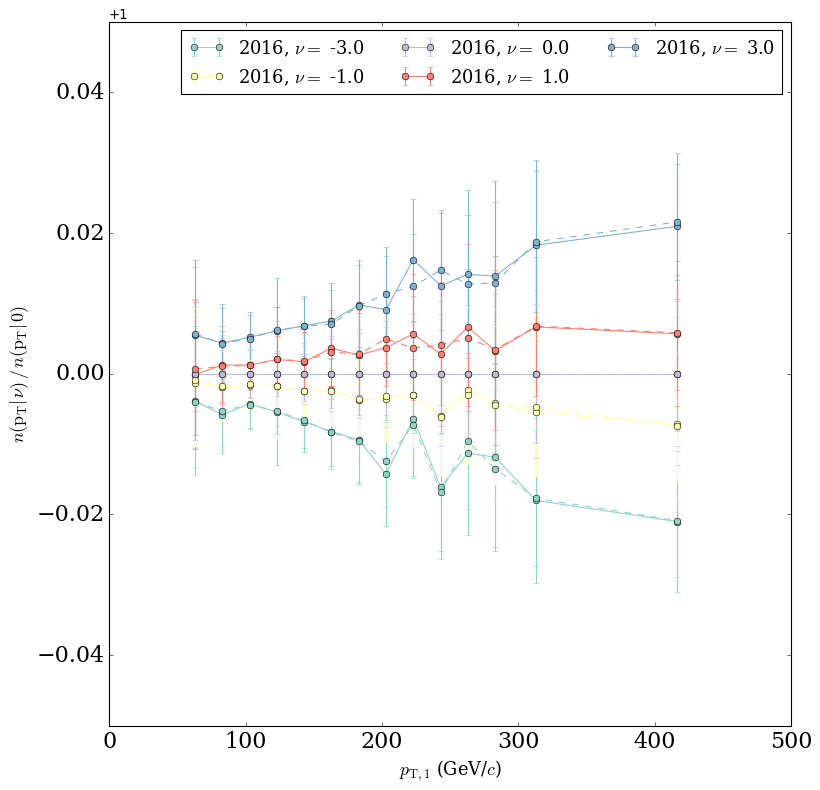

In [16]:
year = '2016'

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
fig = plt.figure(figsize=(11, 11))
fig.patch.set_facecolor('white') 

bins = np.append(np.arange(33, 303, 20),np.array([333, 500]))
x = 0.5*(bins[1:]+bins[:-1])
i=0
for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
    idx_pt1 = np.argwhere(np.array(K_REF[year][nu_str])=='leadmupt').reshape(-1,)[0]
    h_0   = plt.hist(REF[year]['0.0'][:, idx_pt1],  weights=W_REF[year]['0.0'][:, 0],     bins=bins, alpha=0.)[0]
    h_02  = plt.hist(REF[year]['0.0'][:, idx_pt1],  weights=W_REF[year]['0.0'][:, 0]**2,  bins=bins, alpha=0.)[0]
    h_nu  = plt.hist(REF[year][nu_str][:, idx_pt1], weights=W_REF[year][nu_str][:, 0],    bins=bins, alpha=0.)[0]
    h_nu2 = plt.hist(REF[year][nu_str][:, idx_pt1], weights=W_REF[year][nu_str][:, 0]**2, bins=bins, alpha=0.)[0]
    
    r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
                     label=year+r', $\nu=$ '+nu_str, marker='o', color=colors[i])
    ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
    i+=1
i=0
for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
    idx_pt1 = np.argwhere(np.array(K_REF[year][nu_str])=='leadmupt').reshape(-1,)[0]
    mask = (W_REF[year]['0.0'][:, 0]>0)*(W_REF[year]['0.0'][:, 0]<0.5)
    sample = REF[year]['0.0'][:, idx_pt1]
    sample = sample[mask]
    w = W_REF[year]['0.0'][:, 0]
    w = w[mask]
    h_0   = plt.hist(sample,  weights=w,     bins=bins, alpha=0.)[0]
    h_02  = plt.hist(sample,  weights=w**2,  bins=bins, alpha=0.)[0]
    mask = (W_REF[year][nu_str][:, 0]>0)*(W_REF[year][nu_str][:, 0]<0.5)
    sample = REF[year][nu_str][:, idx_pt1]
    sample = sample[mask]
    w = W_REF[year][nu_str][:, 0]
    w = w[mask]
    h_nu  = plt.hist(sample,  weights=w,     bins=bins, alpha=0.)[0]
    h_nu2 = plt.hist(sample,  weights=w**2,  bins=bins, alpha=0.)[0]
    
    r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
                     marker='o', color=colors[i], ls='--')
    ratios_after_weights_selection[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
    i+=1
plt.ylabel(r'$n({\rmp_T}|\,\nu)\, /\, n({\rm p_T}|\,0)$', fontsize=16, fontname='serif')
plt.xlabel(xlabel_dict['leadmupt'], fontsize=16, fontname='serif')
plt.ylim(0.95, 1.05)
#plt.xscale('log')
#plt.yscale('log')
plt.yticks(fontsize=20, fontname='serif')
plt.xticks(fontsize=20, fontname='serif')
font = font_manager.FontProperties(family='serif', size=16)
plt.legend(loc='best',ncol=3, prop=font)
plt.show()

/tmp/ipykernel_2002/2180393991.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_2002/2180393991.py:21: RuntimeWarning: invalid value encountered in true_divide
  ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
/tmp/ipykernel_2002/2180393991.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_2002/2180393991.py:21: RuntimeWarning: invalid value encountered in true_divide
  ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
/tmp/ipykernel_2002/2180393991.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_2002/2180393991.py:21: RuntimeWarning: invalid value encountered in true_d

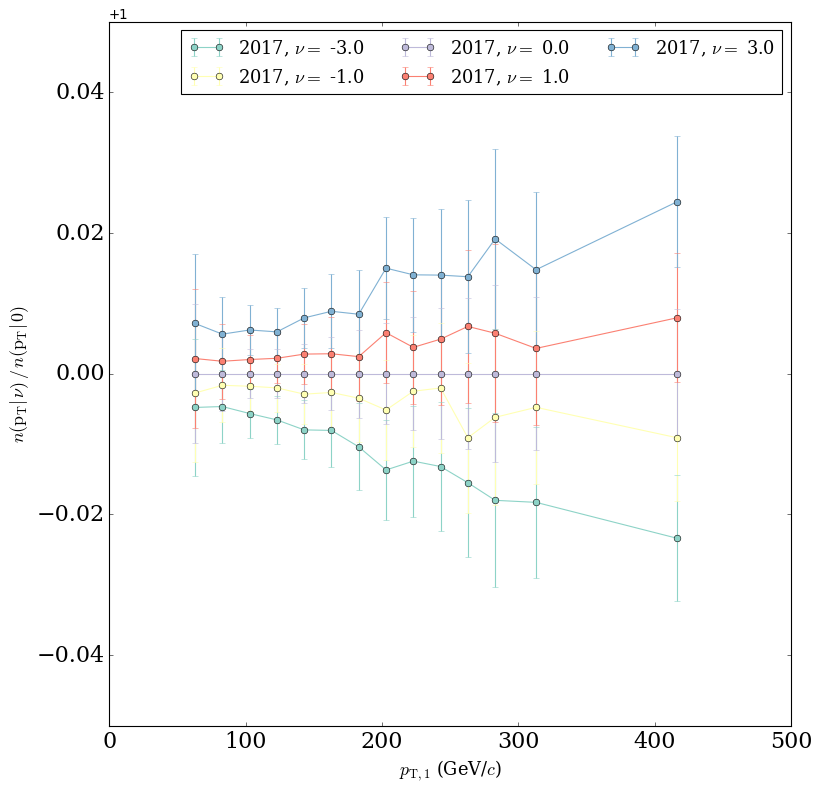

In [26]:
year = '2017'

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
fig = plt.figure(figsize=(11, 11))
fig.patch.set_facecolor('white') 

bins = np.append(np.arange(33, 303, 20),np.array([333, 500]))
x = 0.5*(bins[1:]+bins[:-1])
i=0
for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
    idx_pt1 = np.argwhere(np.array(K_REF[year][nu_str])=='leadmupt').reshape(-1,)[0]
    h_0   = plt.hist(REF[year]['0.0'][:, idx_pt1],  weights=W_REF[year]['0.0'][:, 0],     bins=bins, alpha=0.)[0]
    h_02  = plt.hist(REF[year]['0.0'][:, idx_pt1],  weights=W_REF[year]['0.0'][:, 0]**2,  bins=bins, alpha=0.)[0]
    h_nu  = plt.hist(REF[year][nu_str][:, idx_pt1], weights=W_REF[year][nu_str][:, 0],    bins=bins, alpha=0.)[0]
    h_nu2 = plt.hist(REF[year][nu_str][:, idx_pt1], weights=W_REF[year][nu_str][:, 0]**2, bins=bins, alpha=0.)[0]
    
    r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
                     label=year+r', $\nu=$ '+nu_str, marker='o', color=colors[i])
    ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
    i+=1
plt.ylabel(r'$n({\rmp_T}|\,\nu)\, /\, n({\rm p_T}|\,0)$', fontsize=16, fontname='serif')
plt.xlabel(xlabel_dict['leadmupt'], fontsize=16, fontname='serif')
plt.ylim(0.95, 1.05)
#plt.xscale('log')
#plt.yscale('log')
plt.yticks(fontsize=20, fontname='serif')
plt.xticks(fontsize=20, fontname='serif')
font = font_manager.FontProperties(family='serif', size=16)
plt.legend(loc='best',ncol=3, prop=font)
plt.show()

/tmp/ipykernel_551/1741828668.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_551/1741828668.py:21: RuntimeWarning: invalid value encountered in true_divide
  ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
/tmp/ipykernel_551/1741828668.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_551/1741828668.py:21: RuntimeWarning: invalid value encountered in true_divide
  ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
/tmp/ipykernel_551/1741828668.py:19: RuntimeWarning: invalid value encountered in true_divide
  r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
/tmp/ipykernel_551/1741828668.py:21: RuntimeWarning: invalid value encountered in true_divide


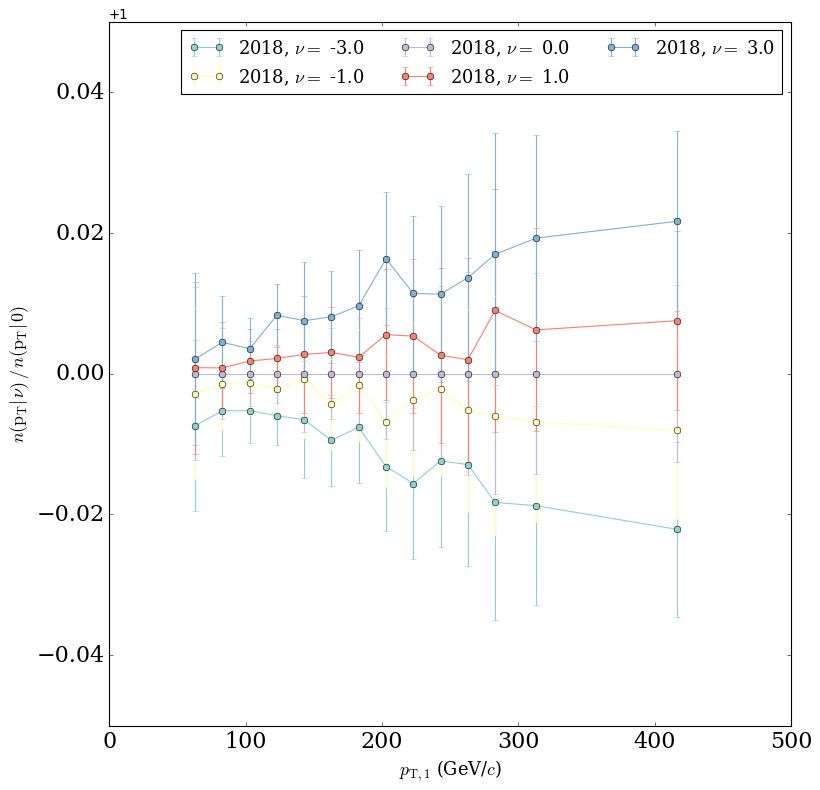

In [46]:
year = '2018'

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
fig = plt.figure(figsize=(11, 11))
fig.patch.set_facecolor('white') 

bins = np.append(np.arange(33, 303, 20),np.array([333, 500]))
x = 0.5*(bins[1:]+bins[:-1])
i=0
for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
    idx_pt1 = np.argwhere(np.array(K_REF[year][nu_str])=='leadmupt').reshape(-1,)[0]
    h_0   = plt.hist(REF[year]['0.0'][:, idx_pt1],  weights=W_REF[year]['0.0'][:, 0],     bins=bins, alpha=0.)[0]
    h_02  = plt.hist(REF[year]['0.0'][:, idx_pt1],  weights=W_REF[year]['0.0'][:, 0]**2,  bins=bins, alpha=0.)[0]
    h_nu  = plt.hist(REF[year][nu_str][:, idx_pt1], weights=W_REF[year][nu_str][:, 0],    bins=bins, alpha=0.)[0]
    h_nu2 = plt.hist(REF[year][nu_str][:, idx_pt1], weights=W_REF[year][nu_str][:, 0]**2, bins=bins, alpha=0.)[0]
    
    r = plt.errorbar(x, h_nu/h_0, yerr=h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2)),
                     label=year+r', $\nu=$ '+nu_str, marker='o', color=colors[i])
    ratios[year][nu_str] = [h_nu/h_0,h_nu/h_0*np.sqrt(h_nu2/(h_nu**2) + h_02/(h_0**2))]
    i+=1
plt.ylabel(r'$n({\rmp_T}|\,\nu)\, /\, n({\rm p_T}|\,0)$', fontsize=16, fontname='serif')
plt.xlabel(xlabel_dict['leadmupt'], fontsize=16, fontname='serif')
plt.ylim(0.95, 1.05)
#plt.xscale('log')
#plt.yscale('log')
plt.yticks(fontsize=20, fontname='serif')
plt.xticks(fontsize=20, fontname='serif')
font = font_manager.FontProperties(family='serif', size=16)
plt.legend(loc='best',ncol=3, prop=font)
plt.show()

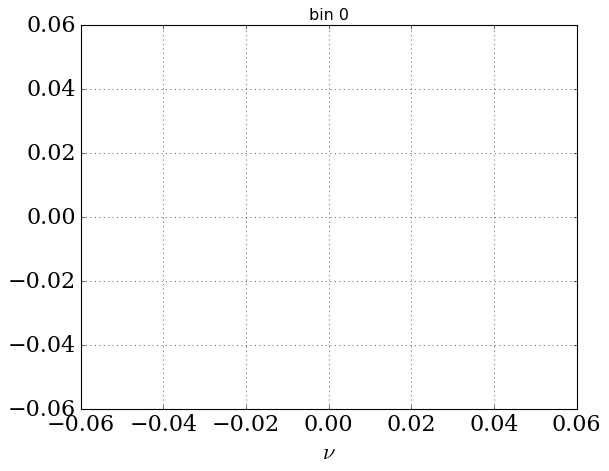

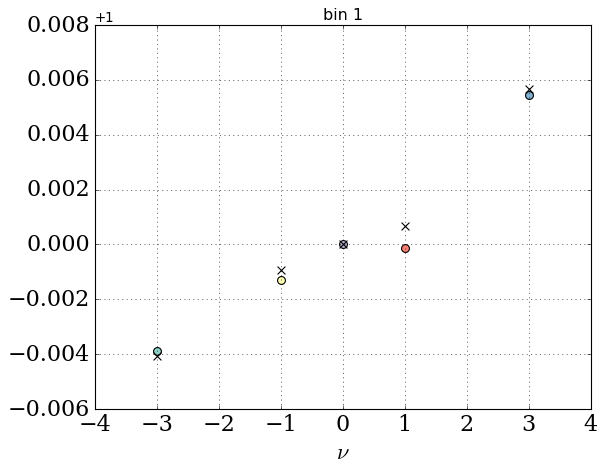

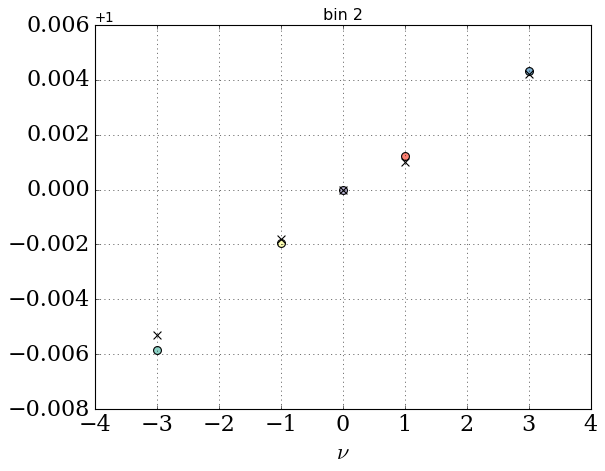

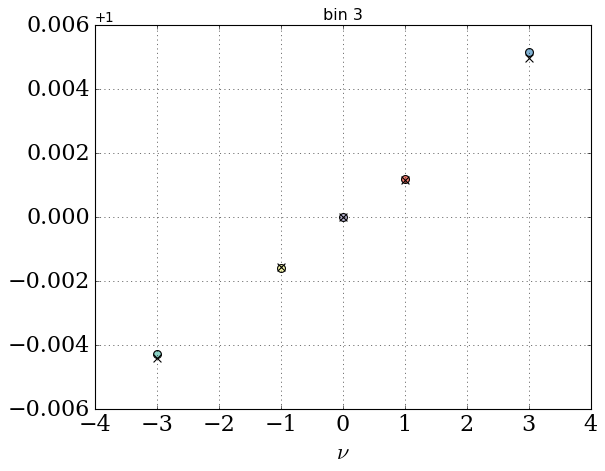

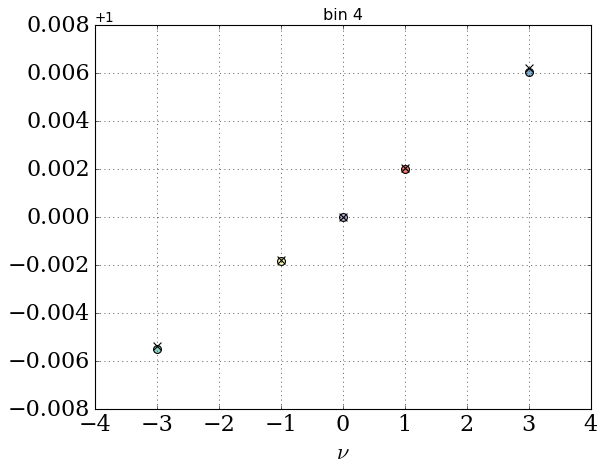

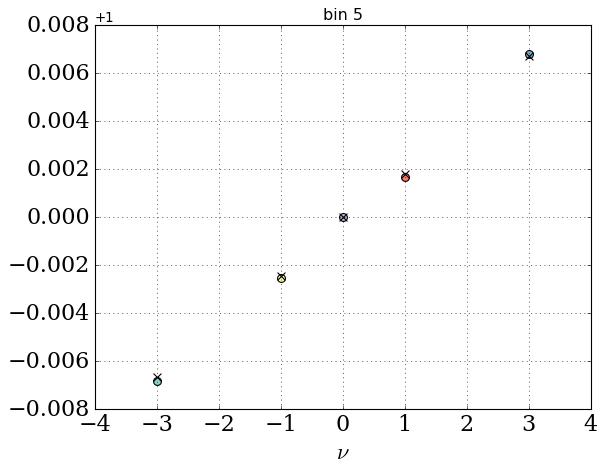

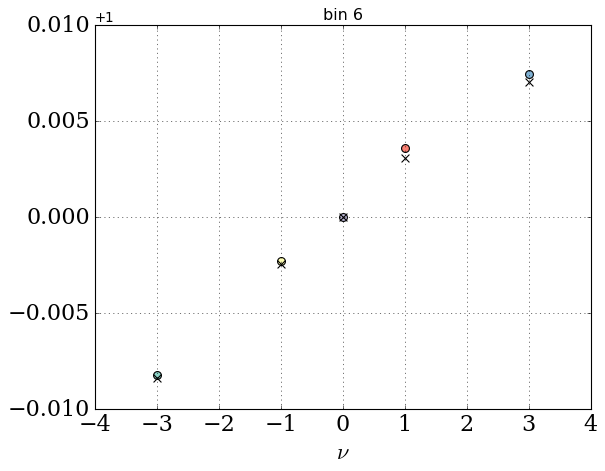

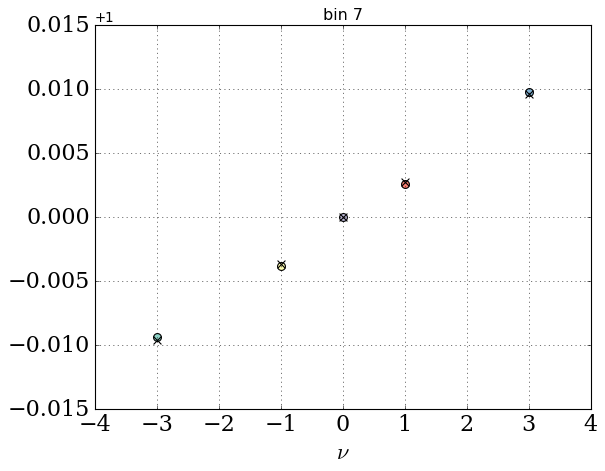

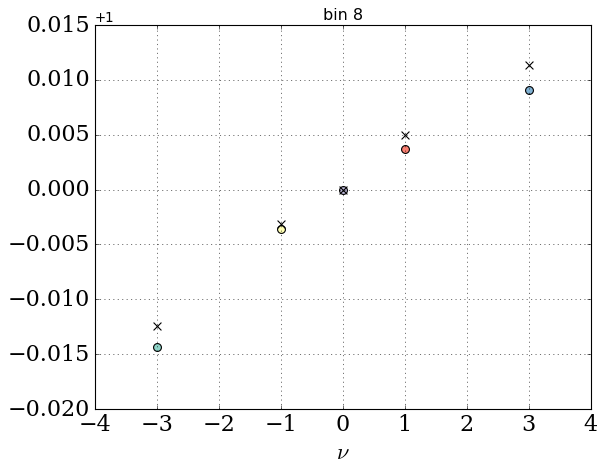

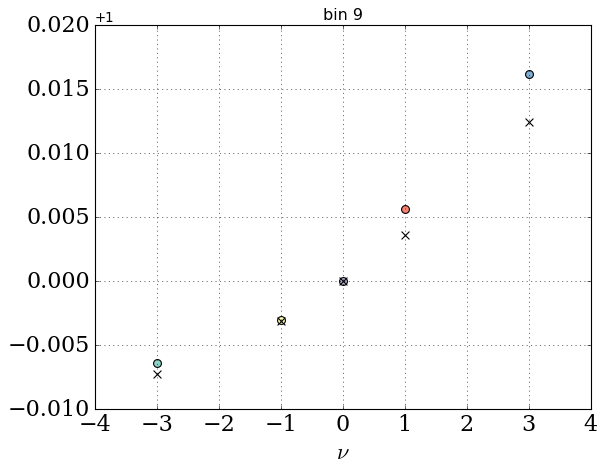

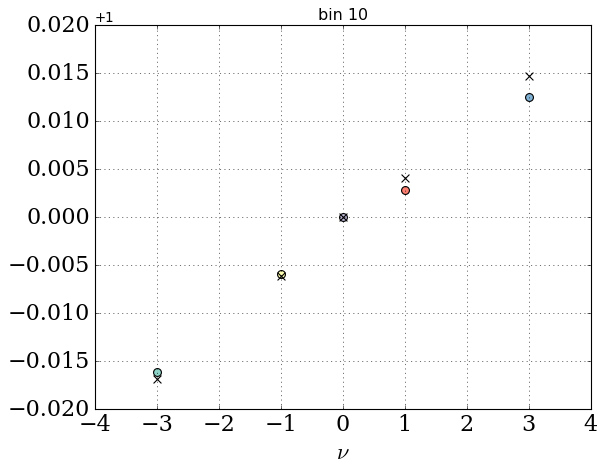

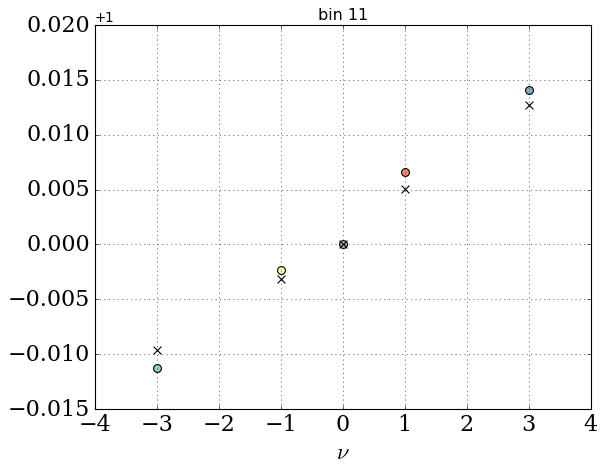

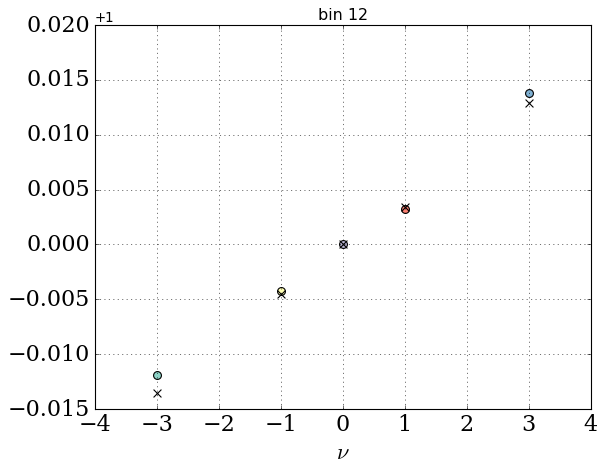

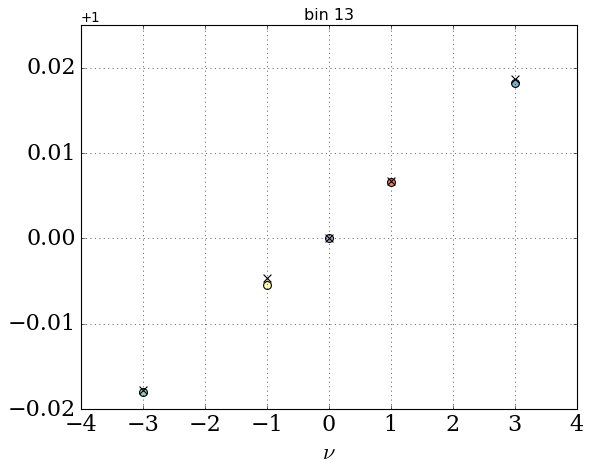

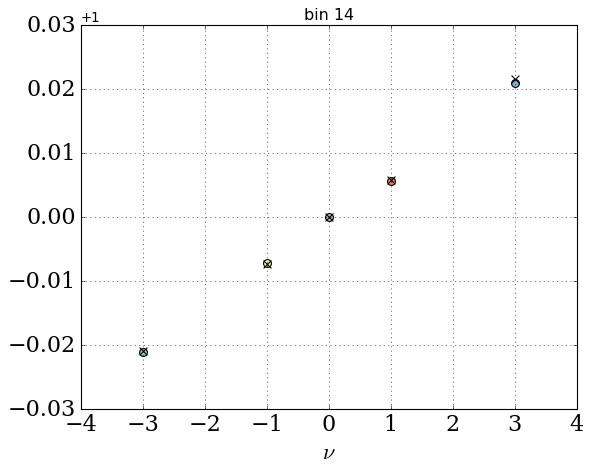

In [17]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic') 
year = '2016'
for i in range(len(x)):
    j=0
    fig = plt.figure(figsize=(8, 6))
    fig.patch.set_facecolor('white')
    for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
        plt.scatter(float(nu_str), ratios[year][nu_str][0][i], marker='o', color=colors[j], ec='black', s=50)
        plt.scatter(float(nu_str), ratios_after_weights_selection[year][nu_str][0][i], marker='x', color=colors[j], ec='black', s=50)
        j+=1
    plt.xlabel(r'$\nu$', fontsize=20, fontname='serif')
    plt.yticks(fontsize=20, fontname='serif')
    plt.xticks(fontsize=20, fontname='serif')
    plt.title('bin %i'%(i))
    plt.grid()
    plt.show()
    plt.close()

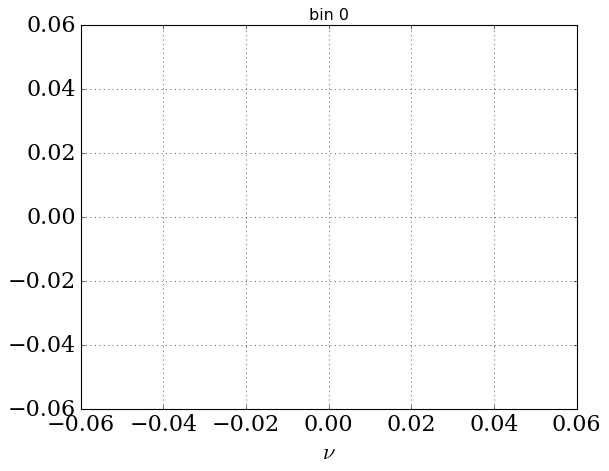

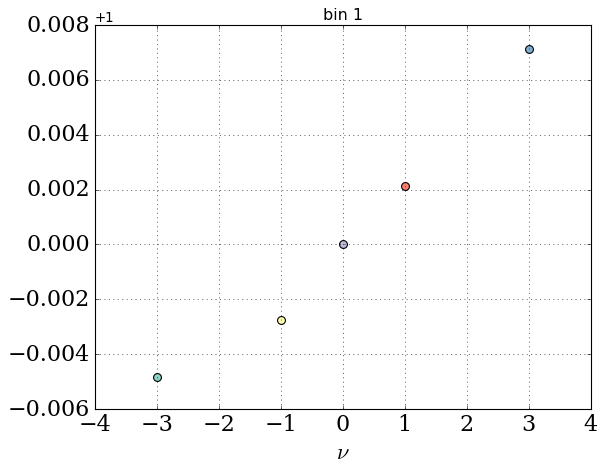

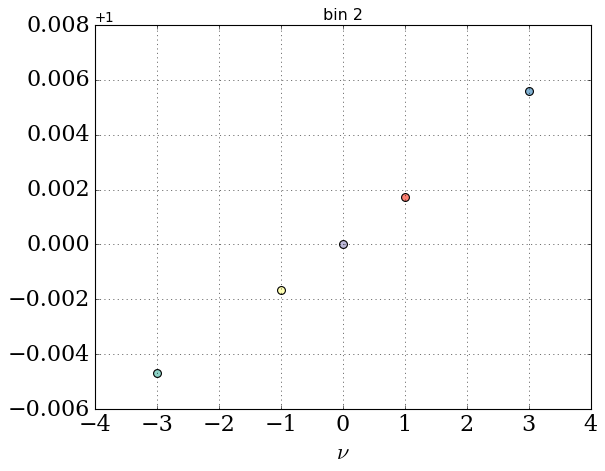

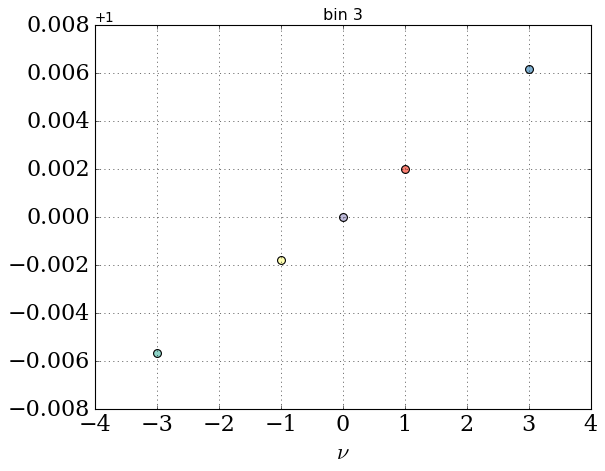

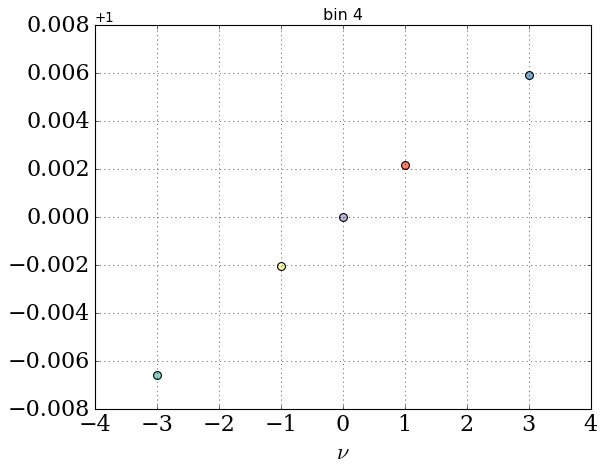

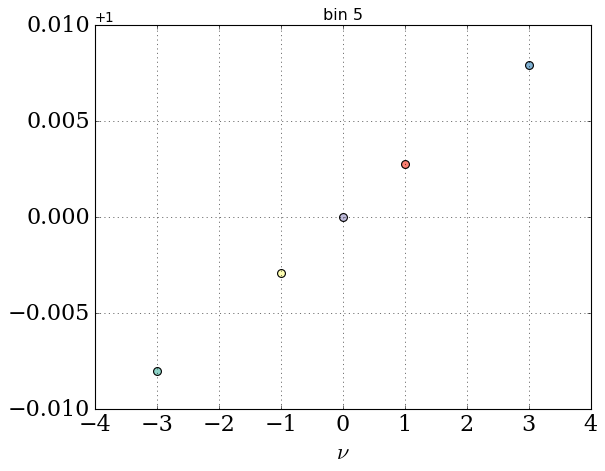

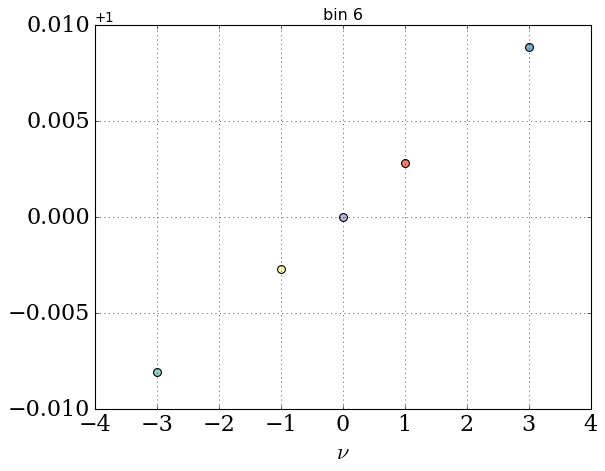

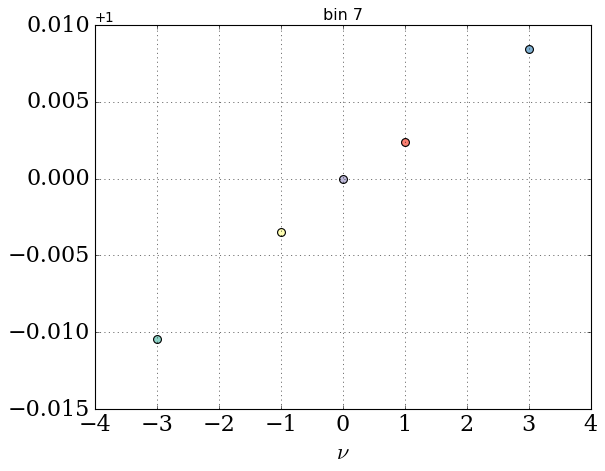

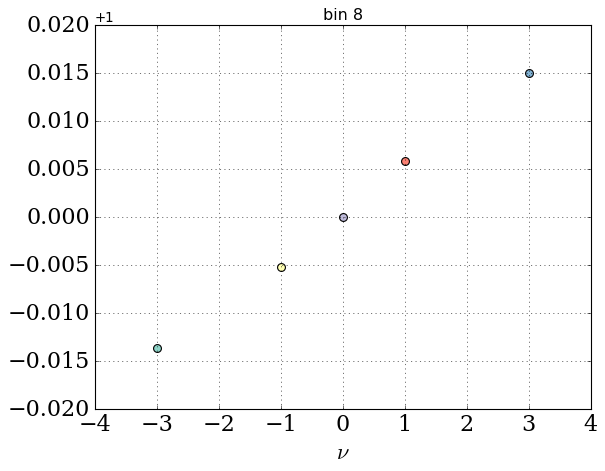

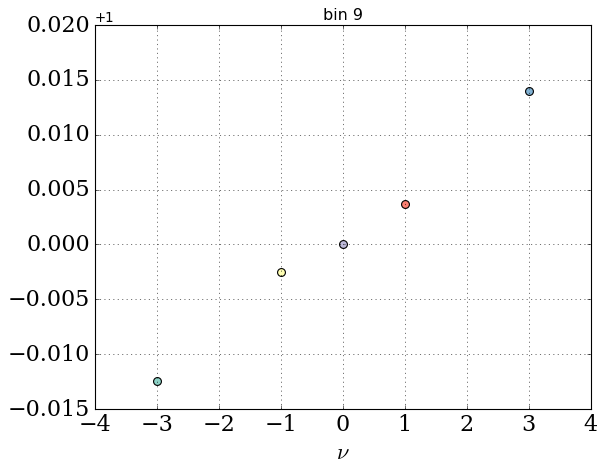

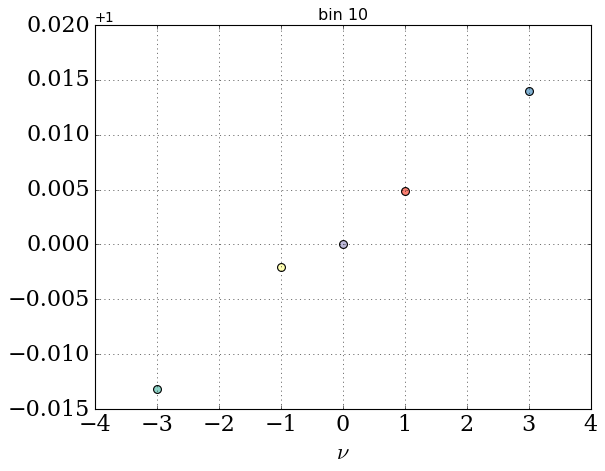

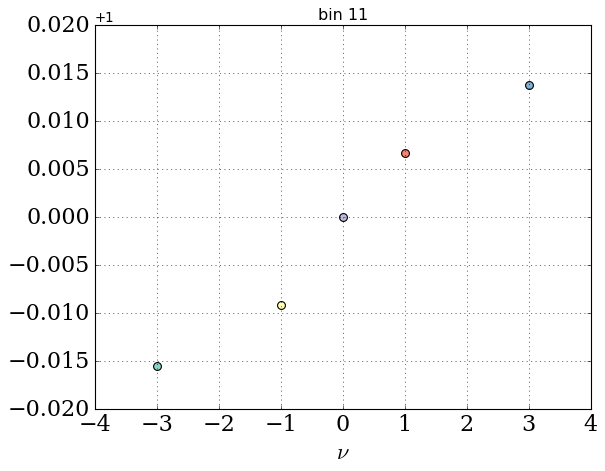

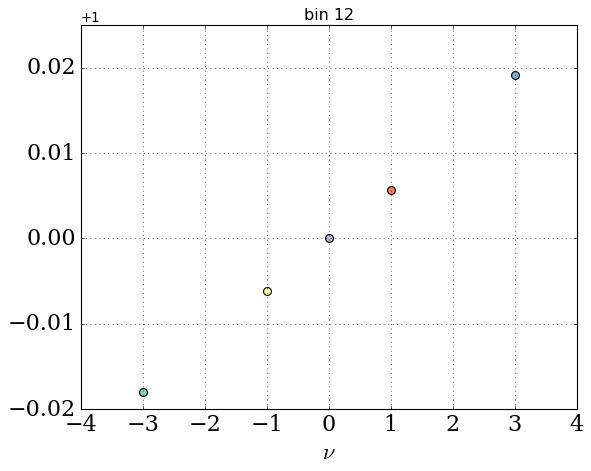

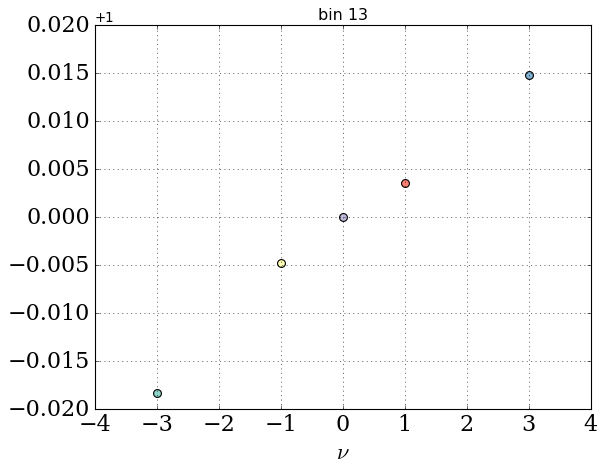

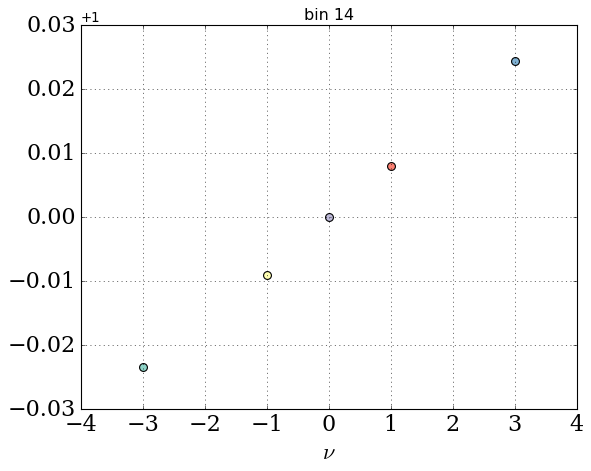

In [27]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic') 
year = '2017'
for i in range(len(x)):
    j=0
    fig = plt.figure(figsize=(8, 6))
    fig.patch.set_facecolor('white')
    for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
        plt.scatter(float(nu_str), ratios[year][nu_str][0][i], marker='o', color=colors[j], ec='black', s=50)
        j+=1
    plt.xlabel(r'$\nu$', fontsize=20, fontname='serif')
    plt.yticks(fontsize=20, fontname='serif')
    plt.xticks(fontsize=20, fontname='serif')
    plt.title('bin %i'%(i))
    plt.grid()
    plt.show()
    plt.close()

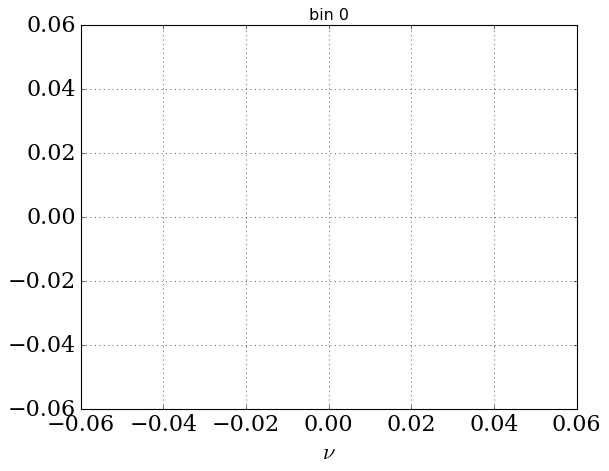

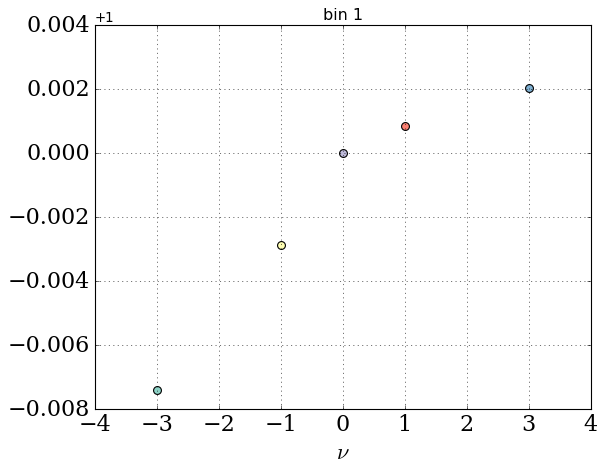

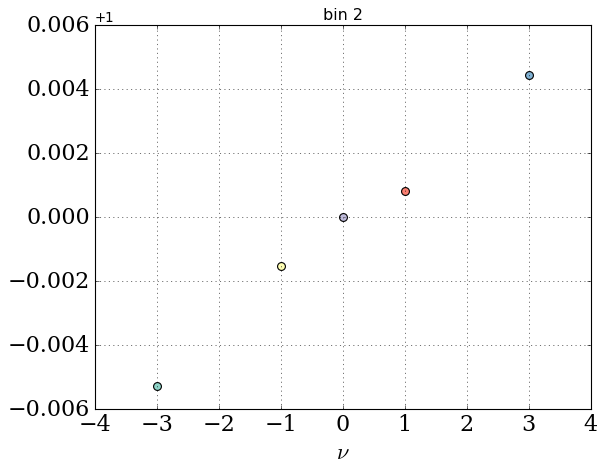

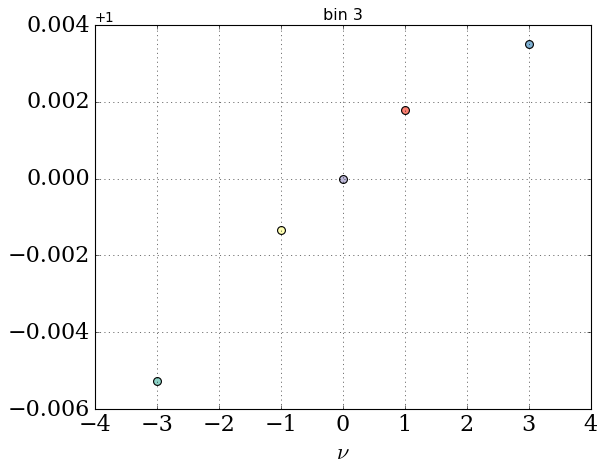

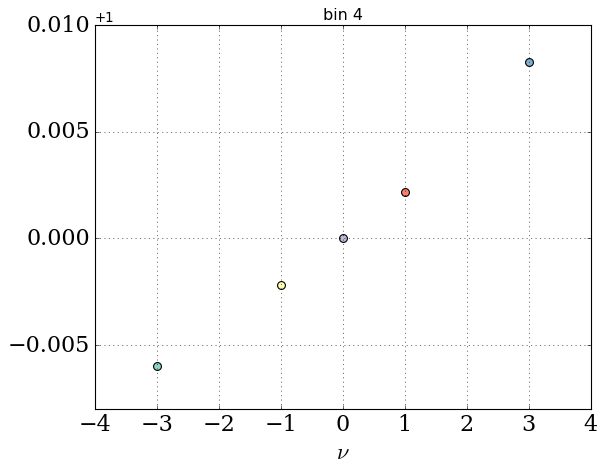

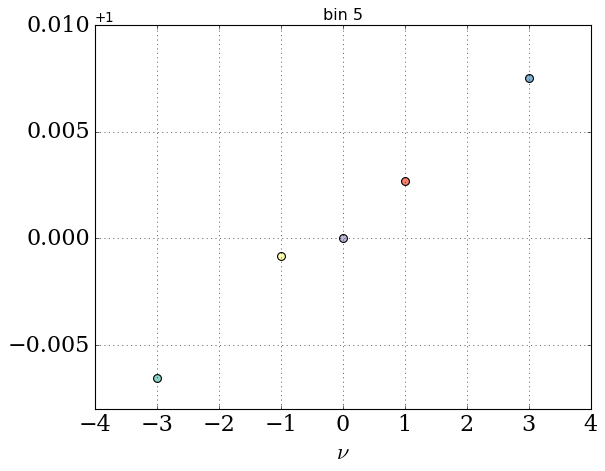

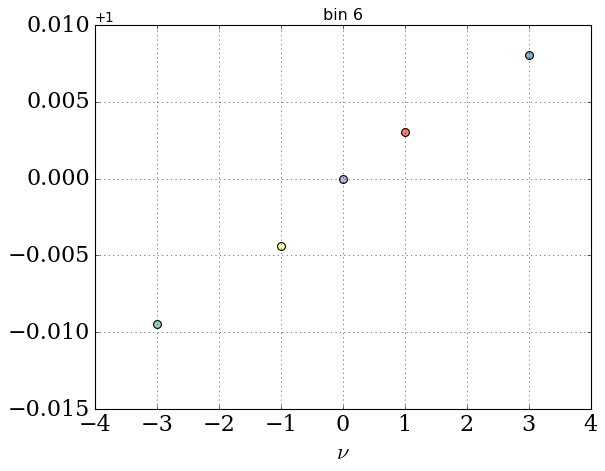

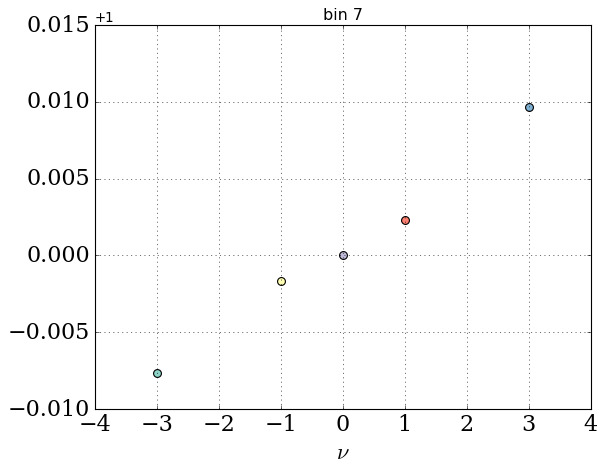

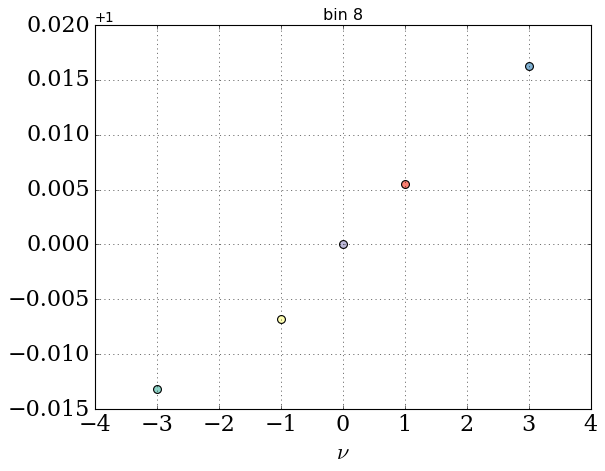

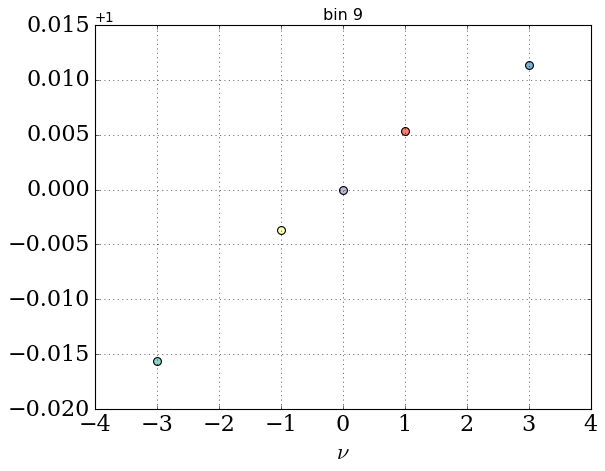

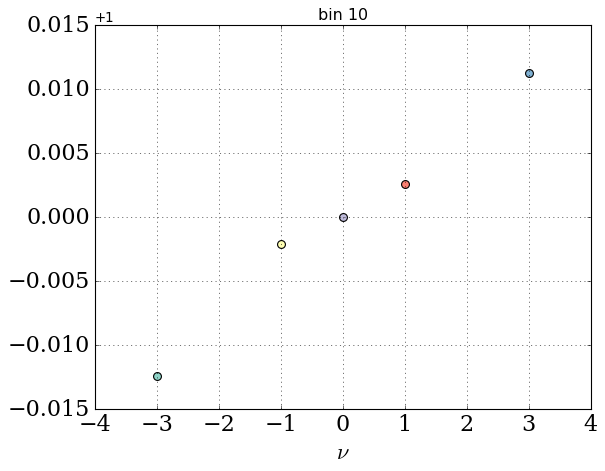

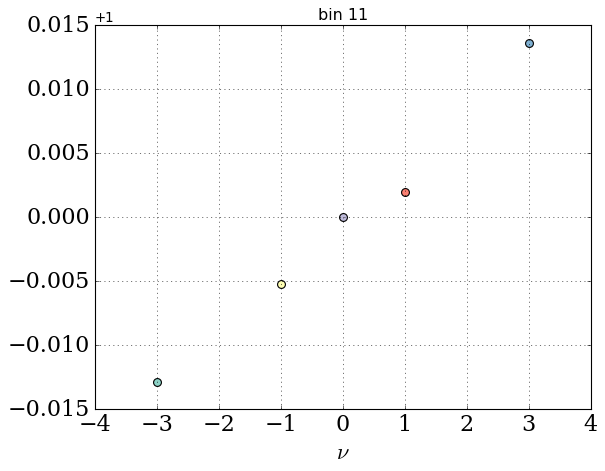

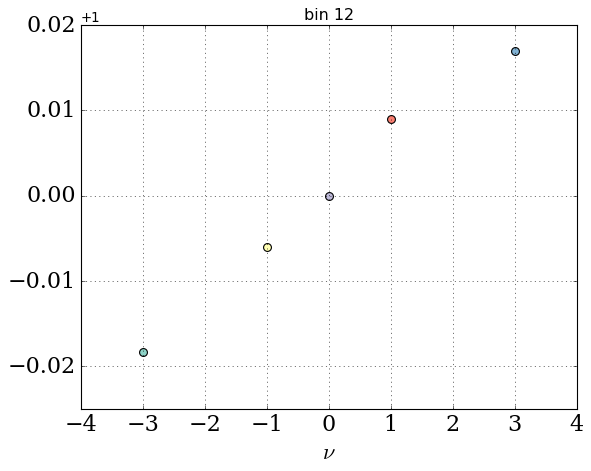

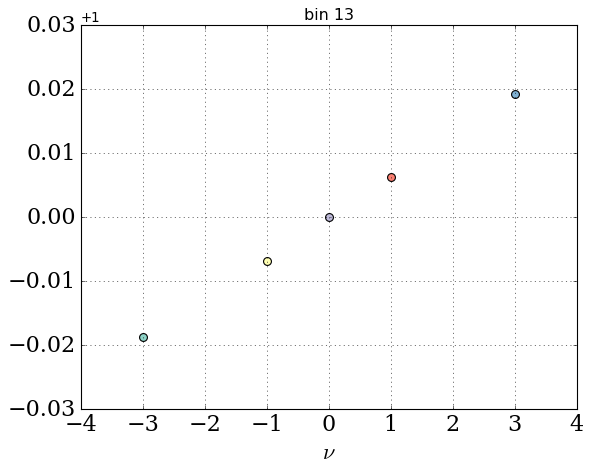

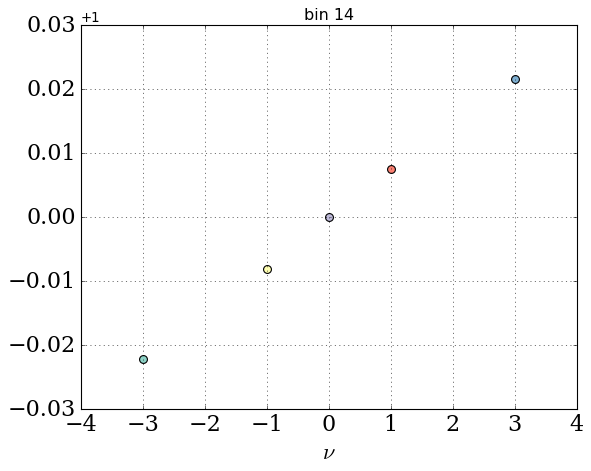

In [47]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
plt.rcParams["font.family"] = "serif"
plt.style.use('classic') 
year = '2018'
for i in range(len(x)):
    j=0
    fig = plt.figure(figsize=(8, 6))
    fig.patch.set_facecolor('white')
    for nu_str in ['-3.0', '-1.0', '0.0', '1.0', '3.0']:
        plt.scatter(float(nu_str), ratios[year][nu_str][0][i], marker='o', color=colors[j], ec='black', s=50)
        j+=1
    plt.xlabel(r'$\nu$', fontsize=20, fontname='serif')
    plt.yticks(fontsize=20, fontname='serif')
    plt.xticks(fontsize=20, fontname='serif')
    plt.title('bin %i'%(i))
    plt.grid()
    plt.show()
    plt.close()